<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br>
<b> DM-42979-Update calibrateImage source selector </b><br>
Notebook comparing updated calibrateImage source selector in <code>pipe_tasks</code> to main. <br> <br>

Contact author: Audrey Budlong <br>
Last verified to run: 16 October 2024 <br>
LSST Science Pipelines version: <code>d_2024_09_30</code> <br>
Additional notes: run with a local ap_verfify run of <code>ap_verify_ci_hits2015</code> <br>

## Run details

Baseline run using <code>d_2024_09_30</code>. 

### Table of Contents

1. Main package imports
2. Configuring data access
3. APBD Source Comparison
4. Visualizing APDB Source Comparison
5. Image Cutouts
6. Visualzing Flags

### 1. Main package imports

In [1]:
import lsst.afw.display as afwDisplay
import lsst.geom as geom
import gc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from astropy.table import Table
from astropy.visualization import make_lupton_rgb
from astropy.wcs import WCS
from lsst.afw.image import MultibandExposure
from lsst.analysis.ap import apdb, nb_utils
from lsst.analysis.ap import plotImageSubtractionCutouts as plotISC
from lsst.daf.butler import Butler
from sqlalchemy import select, func

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### 2. Configuring data access

In [2]:
repo_main = '/Users/audrey/Documents/LSST/code/ap_verify-runs/DECam/d_2024_09_30/repo/butler.yaml'
repo_updated = '/Users/audrey/Documents/LSST/code/ap_verify-runs/DECam/d_2024_09_30-DM42979/repo/butler.yaml'
collections = 'ap_verify-output'
instrument = 'DECam'
skymap = 'decam_rings_v1'

butler_main = Butler(repo_main, collections=collections)
butler_updated = Butler(repo_updated, collections=collections)

dbType = 'sqlite'
dbName_main = '/Users/audrey/Documents/LSST/code/ap_verify-runs/DECam/d_2024_09_30/association.db'
dbName_updated = '/Users/audrey/Documents/LSST/code/ap_verify-runs/DECam/d_2024_09_30-DM42979/association.db'

reader_main = apdb.ApdbSqliteQuery(dbName_main, instrument=instrument)
reader_updated = apdb.ApdbSqliteQuery(dbName_updated, instrument=instrument)

In [3]:
len(reader_main._tables), len(reader_updated._tables)

(6, 6)

In [4]:
main_run = {
    'repo': repo_main,
    'collections': collections,
    'instrument': instrument,
    'skymap': skymap,
    'butler': butler_main,
    'dbType': dbType,
    'dbName': dbName_main,
    'reader': reader_main
}

updated_run = {
    'repo': repo_updated,
    'collections': collections,
    'instrument': instrument,
    'skymap': skymap,
    'butler': butler_updated,
    'dbType': dbType,
    'dbName': dbName_updated,
    'reader': reader_updated
}

In [5]:
main_run['run_name'] = 'Main'
updated_run['run_name'] = 'Updated'

In [6]:
registry_main = butler_main.registry
registry_updated = butler_updated.registry

datarefs_main = list(registry_main.queryDatasets('initial_pvi'))
datarefs_updated = list(registry_updated.queryDatasets('initial_pvi'))

In [7]:
main_run['robjTable'] = main_run['reader'].load_objects()
main_run['rsrcTable'] = main_run['reader'].load_sources()

updated_run['robjTable'] = updated_run['reader'].load_objects()
updated_run['rsrcTable'] = updated_run['reader'].load_sources()

### 3. APBD Source Comparison

#### Test run to compare main with itself

In [8]:
selfTest1, selfTest2, selfMatchedTest = nb_utils.compare_sources(repo_main, repo_main, reader_main, reader_main)

774 matched sources; 0 unique to set 1; 1 unique to set 2.


In [9]:
selfTest2

diaSourceId   visit  detector        diaObjectId  ssObjectId  \
670  88351793720852633  411420        10  88351793720852633           0   

     parentDiaSourceId ssObjectReassocTime  midpointMjdTai          ra  raErr  \
670                  0                None    57071.295628  155.241751    NaN   

          dec  decErr  ra_dec_Cov      x  xErr       y  yErr x_y_Cov  \
670 -5.880349     NaN         NaN  194.0   NaN  3688.0   NaN    None   

     centroid_flag      apFlux   apFluxErr  apFlux_flag  \
670           True  313.421478  497.222107         True   

     apFlux_flag_apertureTruncated     snr     psfFlux  psfFluxErr psfRa  \
670                          False  5.1384 -662.004761  132.651642  None   

    psfRaErr psfDec psfDecErr psfFlux_psfRa_Cov psfFlux_psfDec_Cov  \
670     None   None      None              None               None   

    psfRa_psfDec_Cov psfLnL     psfChi2  psfNdata  psfFlux_flag  \
670             None   None  1742.02417      1681          True   

     psfFlux_flag_edge  psfFlux_flag_noGoodPixels  trailFlux trailFluxErr  \
670              False                      False        NaN         None   

     trailRa trailRaErr  trailDec trailDecErr  trailLength trailLengthErr  \
670      NaN       None       NaN        None          NaN           None   

     trailAngle trailAngleErr trailFlux_trailRa_Cov trailFlux_trailDec_Cov  \
670         NaN          None                  None                   None   

    trailFlux_trailLength_Cov trailFlux_trailAngle_Cov trailRa_trailDec_Cov  \
670                      None                     None                 None   

    trailRa_trailLength_Cov trailRa_trailAngle_Cov trailDec_trailLength_Cov  \
670                    None                   None                     None   

    trailDec_trailAngle_Cov trailLength_trailAngle_Cov trailLnL trailChi2  \
670                    None                       None     None      None   

     trailNdata  trail_flag_edge  dipoleMeanFlux  dipoleMeanFluxErr  \
670           0            False             NaN                NaN   

     dipoleFluxDiff  dipoleFluxDiffErr dipoleRa dipoleRaErr dipoleDec  \
670             NaN                NaN     None        None      None   

    dipoleDecErr  dipoleLength dipoleLengthErr  dipoleAngle dipoleAngleErr  \
670         None           NaN            None          NaN           None   

    dipoleMeanFlux_dipoleFluxDiff_Cov dipoleMeanFlux_dipoleRa_Cov  \
670                              None                        None   

    dipoleMeanFlux_dipoleDec_Cov dipoleMeanFlux_dipoleLength_Cov  \
670                         None                            None   

    dipoleMeanFlux_dipoleAngle_Cov dipoleFluxDiff_dipoleRa_Cov  \
670                           None                        None   

    dipoleFluxDiff_dipoleDec_Cov dipoleFluxDiff_dipoleLength_Cov  \
670                         None                            None   

    dipoleFluxDiff_dipoleAngle_Cov dipoleRa_dipoleDec_Cov  \
670                           None                   None   

    dipoleRa_dipoleLength_Cov dipoleRa_dipoleAngle_Cov  \
670                      None                     None   

    dipoleDec_dipoleLength_Cov dipoleDec_dipoleAngle_Cov  \
670                       None                      None   

    dipoleLength_dipoleAngle_Cov dipoleLnL  dipoleChi2  dipoleNdata  \
670                         None      None         NaN            0   

     scienceFlux  scienceFluxErr  forced_PsfFlux_flag  \
670    61.710293      128.291245                 True   

     forced_PsfFlux_flag_edge  forced_PsfFlux_flag_noGoodPixels snapDiffFlux  \
670                     False                             False         None   

    snapDiffFluxErr fpBkgd fpBkgdErr  ixx ixxErr  iyy iyyErr  ixy ixyErr  \
670            None   None      None  NaN   None  NaN   None  NaN   None   

    ixx_iyy_Cov ixx_ixy_Cov iyy_ixy_Cov    ixxPSF    iyyPSF    ixyPSF  \
670        None        None        None  0.147386  0.004286  0.00

#### Comparing main with updated versions

In [10]:
uniqueMain, uniqueUpdated, matched = nb_utils.compare_sources(repo_main, repo_updated, reader_main, reader_updated)

627 matched sources; 147 unique to set 1; 132 unique to set 2.


In [11]:
# uniqueMain

In [12]:
# uniqueUpdated

In [13]:
# matched

#### Checking if unique source found in test run appears in comparison between main and updated

In [14]:
uniqueMain[uniqueMain['diaSourceId']==88351793720852633]

Empty DataFrame
Columns: [diaSourceId, visit, detector, diaObjectId, ssObjectId, parentDiaSourceId, ssObjectReassocTime, midpointMjdTai, ra, raErr, dec, decErr, ra_dec_Cov, x, xErr, y, yErr, x_y_Cov, centroid_flag, apFlux, apFluxErr, apFlux_flag, apFlux_flag_apertureTruncated, snr, psfFlux, psfFluxErr, psfRa, psfRaErr, psfDec, psfDecErr, psfFlux_psfRa_Cov, psfFlux_psfDec_Cov, psfRa_psfDec_Cov, psfLnL, psfChi2, psfNdata, psfFlux_flag, psfFlux_flag_edge, psfFlux_flag_noGoodPixels, trailFlux, trailFluxErr, trailRa, trailRaErr, trailDec, trailDecErr, trailLength, trailLengthErr, trailAngle, trailAngleErr, trailFlux_trailRa_Cov, trailFlux_trailDec_Cov, trailFlux_trailLength_Cov, trailFlux_trailAngle_Cov, trailRa_trailDec_Cov, trailRa_trailLength_Cov, trailRa_trailAngle_Cov, trailDec_trailLength_Cov, trailDec_trailAngle_Cov, trailLength_trailAngle_Cov, trailLnL, trailChi2, trailNdata, trail_flag_edge, dipoleMeanFlux, dipoleMeanFluxErr, dipoleFluxDiff, dipoleFluxDiffErr, dipoleRa, dipoleRaErr, dipoleDec, dipoleDecErr, dipoleLength, dipoleLengthErr, dipoleAngle, dipoleAngleErr, dipoleMeanFlux_dipoleFluxDiff_Cov, dipoleMeanFlux_dipoleRa_Cov, dipoleMeanFlux_dipoleDec_Cov, dipoleMeanFlux_dipoleLength_Cov, dipoleMeanFlux_dipoleAngle_Cov, dipoleFluxDiff_dipoleRa_Cov, dipoleFluxDiff_dipoleDec_Cov, dipoleFluxDiff_dipoleLength_Cov, dipoleFluxDiff_dipoleAngle_Cov, dipoleRa_dipoleDec_Cov, dipoleRa_dipoleLength_Cov, dipoleRa_dipoleAngle_Cov, dipoleDec_dipoleLength_Cov, dipoleDec_dipoleAngle_Cov, dipoleLength_dipoleAngle_Cov, dipoleLnL, dipoleChi2, dipoleNdata, scienceFlux, scienceFluxErr, forced_PsfFlux_flag, forced_PsfFlux_flag_edge, forced_PsfFlux_flag_noGoodPixels, snapDiffFlux, snapDiffFluxErr, ...]
Index: []

In [15]:
uniqueUpdated[uniqueUpdated['diaSourceId']==88351793720852633]

Empty DataFrame
Columns: [diaSourceId, visit, detector, diaObjectId, ssObjectId, parentDiaSourceId, ssObjectReassocTime, midpointMjdTai, ra, raErr, dec, decErr, ra_dec_Cov, x, xErr, y, yErr, x_y_Cov, centroid_flag, apFlux, apFluxErr, apFlux_flag, apFlux_flag_apertureTruncated, snr, psfFlux, psfFluxErr, psfRa, psfRaErr, psfDec, psfDecErr, psfFlux_psfRa_Cov, psfFlux_psfDec_Cov, psfRa_psfDec_Cov, psfLnL, psfChi2, psfNdata, psfFlux_flag, psfFlux_flag_edge, psfFlux_flag_noGoodPixels, trailFlux, trailFluxErr, trailRa, trailRaErr, trailDec, trailDecErr, trailLength, trailLengthErr, trailAngle, trailAngleErr, trailFlux_trailRa_Cov, trailFlux_trailDec_Cov, trailFlux_trailLength_Cov, trailFlux_trailAngle_Cov, trailRa_trailDec_Cov, trailRa_trailLength_Cov, trailRa_trailAngle_Cov, trailDec_trailLength_Cov, trailDec_trailAngle_Cov, trailLength_trailAngle_Cov, trailLnL, trailChi2, trailNdata, trail_flag_edge, dipoleMeanFlux, dipoleMeanFluxErr, dipoleFluxDiff, dipoleFluxDiffErr, dipoleRa, dipoleRaErr, dipoleDec, dipoleDecErr, dipoleLength, dipoleLengthErr, dipoleAngle, dipoleAngleErr, dipoleMeanFlux_dipoleFluxDiff_Cov, dipoleMeanFlux_dipoleRa_Cov, dipoleMeanFlux_dipoleDec_Cov, dipoleMeanFlux_dipoleLength_Cov, dipoleMeanFlux_dipoleAngle_Cov, dipoleFluxDiff_dipoleRa_Cov, dipoleFluxDiff_dipoleDec_Cov, dipoleFluxDiff_dipoleLength_Cov, dipoleFluxDiff_dipoleAngle_Cov, dipoleRa_dipoleDec_Cov, dipoleRa_dipoleLength_Cov, dipoleRa_dipoleAngle_Cov, dipoleDec_dipoleLength_Cov, dipoleDec_dipoleAngle_Cov, dipoleLength_dipoleAngle_Cov, dipoleLnL, dipoleChi2, dipoleNdata, scienceFlux, scienceFluxErr, forced_PsfFlux_flag, forced_PsfFlux_flag_edge, forced_PsfFlux_flag_noGoodPixels, snapDiffFlux, snapDiffFluxErr, ...]
Index: []

In [16]:
matched[matched['diaSourceId']==88351793720852633]

diaSourceId   visit  detector        diaObjectId  ssObjectId  \
670  88351793720852633  411420        10  88351793720852633           0   

     parentDiaSourceId ssObjectReassocTime  midpointMjdTai          ra  raErr  \
670                  0                None    57071.295628  155.241751    NaN   

          dec  decErr  ra_dec_Cov      x  xErr       y  yErr x_y_Cov  \
670 -5.880349     NaN         NaN  194.0   NaN  3688.0   NaN    None   

     centroid_flag      apFlux   apFluxErr  apFlux_flag  \
670           True  313.421478  497.222107         True   

     apFlux_flag_apertureTruncated     snr     psfFlux  psfFluxErr psfRa  \
670                          False  5.1384 -662.004761  132.651642  None   

    psfRaErr psfDec psfDecErr psfFlux_psfRa_Cov psfFlux_psfDec_Cov  \
670     None   None      None              None               None   

    psfRa_psfDec_Cov psfLnL     psfChi2  psfNdata  psfFlux_flag  \
670             None   None  1742.02417      1681          True   

     psfFlux_flag_edge  psfFlux_flag_noGoodPixels  trailFlux trailFluxErr  \
670              False                      False        NaN         None   

     trailRa trailRaErr  trailDec trailDecErr  trailLength trailLengthErr  \
670      NaN       None       NaN        None          NaN           None   

     trailAngle trailAngleErr trailFlux_trailRa_Cov trailFlux_trailDec_Cov  \
670         NaN          None                  None                   None   

    trailFlux_trailLength_Cov trailFlux_trailAngle_Cov trailRa_trailDec_Cov  \
670                      None                     None                 None   

    trailRa_trailLength_Cov trailRa_trailAngle_Cov trailDec_trailLength_Cov  \
670                    None                   None                     None   

    trailDec_trailAngle_Cov trailLength_trailAngle_Cov trailLnL trailChi2  \
670                    None                       None     None      None   

     trailNdata  trail_flag_edge  dipoleMeanFlux  dipoleMeanFluxErr  \
670           0            False             NaN                NaN   

     dipoleFluxDiff  dipoleFluxDiffErr dipoleRa dipoleRaErr dipoleDec  \
670             NaN                NaN     None        None      None   

    dipoleDecErr  dipoleLength dipoleLengthErr  dipoleAngle dipoleAngleErr  \
670         None           NaN            None          NaN           None   

    dipoleMeanFlux_dipoleFluxDiff_Cov dipoleMeanFlux_dipoleRa_Cov  \
670                              None                        None   

    dipoleMeanFlux_dipoleDec_Cov dipoleMeanFlux_dipoleLength_Cov  \
670                         None                            None   

    dipoleMeanFlux_dipoleAngle_Cov dipoleFluxDiff_dipoleRa_Cov  \
670                           None                        None   

    dipoleFluxDiff_dipoleDec_Cov dipoleFluxDiff_dipoleLength_Cov  \
670                         None                            None   

    dipoleFluxDiff_dipoleAngle_Cov dipoleRa_dipoleDec_Cov  \
670                           None                   None   

    dipoleRa_dipoleLength_Cov dipoleRa_dipoleAngle_Cov  \
670                      None                     None   

    dipoleDec_dipoleLength_Cov dipoleDec_dipoleAngle_Cov  \
670                       None                      None   

    dipoleLength_dipoleAngle_Cov dipoleLnL  dipoleChi2  dipoleNdata  \
670                         None      None         NaN            0   

     scienceFlux  scienceFluxErr  forced_PsfFlux_flag  \
670    61.710293      128.291245                 True   

     forced_PsfFlux_flag_edge  forced_PsfFlux_flag_noGoodPixels snapDiffFlux  \
670                     False                             False         None   

    snapDiffFluxErr fpBkgd fpBkgdErr  ixx ixxErr  iyy iyyErr  ixy ixyErr  \
670            None   None      None  NaN   None  NaN   None  NaN   None   

    ixx_iyy_Cov ixx_ixy_Cov iyy_ixy_Cov    ixxPSF    iyyPSF    ixyPSF  \
670        None        None        None  0.147386  0.004286  0.00

#### Setting labels for visualization

In [17]:
uniqueMain.insert(2, 'comparisonLabel', ['uniqueMain']*len(uniqueMain))
uniqueUpdated.insert(2, 'comparisonLabel', ['uniqueUpdated']*len(uniqueUpdated))
matched.insert(2, 'comparisonLabel', ['matched']*len(matched))

In [18]:
comparisonSummary = pd.concat([uniqueMain, uniqueUpdated, matched])

### 4. Visualizing APDB Source Comparison

In [19]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

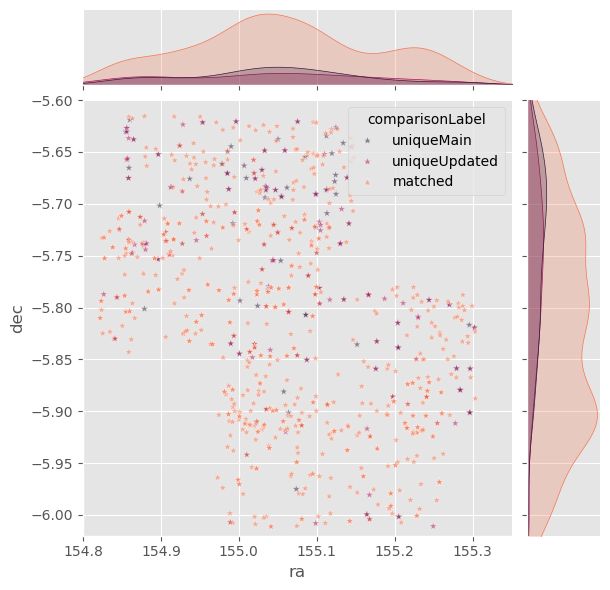

In [20]:
sourceComparison = sns.jointplot(data=comparisonSummary, x="ra", y="dec", hue="comparisonLabel", alpha=0.5, marker='*', palette=sns.color_palette("rocket")[::2]);
sourceComparison.ax_marg_x.set_xlim(154.8, 155.35)
sourceComparison.ax_marg_y.set_ylim(-6.02, -5.60);

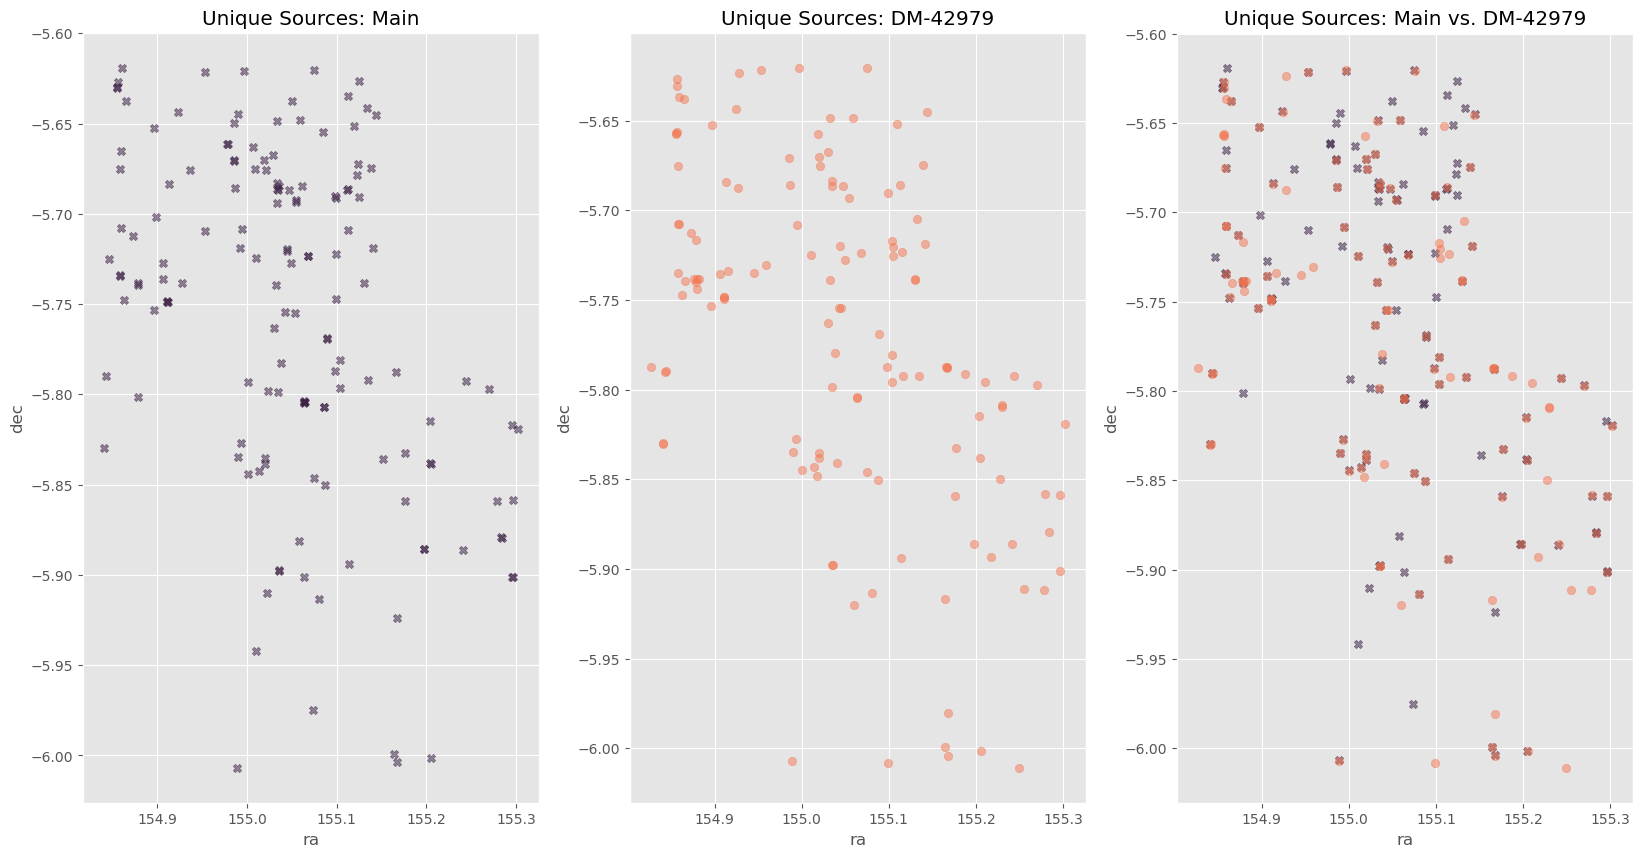

In [21]:
f, axes = plt.subplots(1, 3, figsize=(20,10))
axes[0].scatter(uniqueMain['ra'], uniqueMain['dec'], marker='X', alpha=0.5, color=(0.20973515, 0.09747934, 0.24238489));
axes[0].set_xlabel('ra')
axes[0].set_ylabel('dec')
axes[0].set_title('Unique Sources: Main')

axes[1].scatter(uniqueUpdated['ra'], uniqueUpdated['dec'], marker='o', alpha=0.5, color=(0.95381595, 0.46373781, 0.31769923));
axes[1].set_xlabel('ra')
axes[1].set_ylabel('dec')
axes[1].set_title('Unique Sources: DM-42979')

axes[2].scatter(uniqueMain['ra'], uniqueMain['dec'], marker='X', alpha=0.5, color=(0.20973515, 0.09747934, 0.24238489));
axes[2].scatter(uniqueUpdated['ra'], uniqueUpdated['dec'], marker='o', alpha=0.5, color=(0.95381595, 0.46373781, 0.31769923));
axes[2].set_xlabel('ra')
axes[2].set_ylabel('dec')
axes[2].set_title('Unique Sources: Main vs. DM-42979');

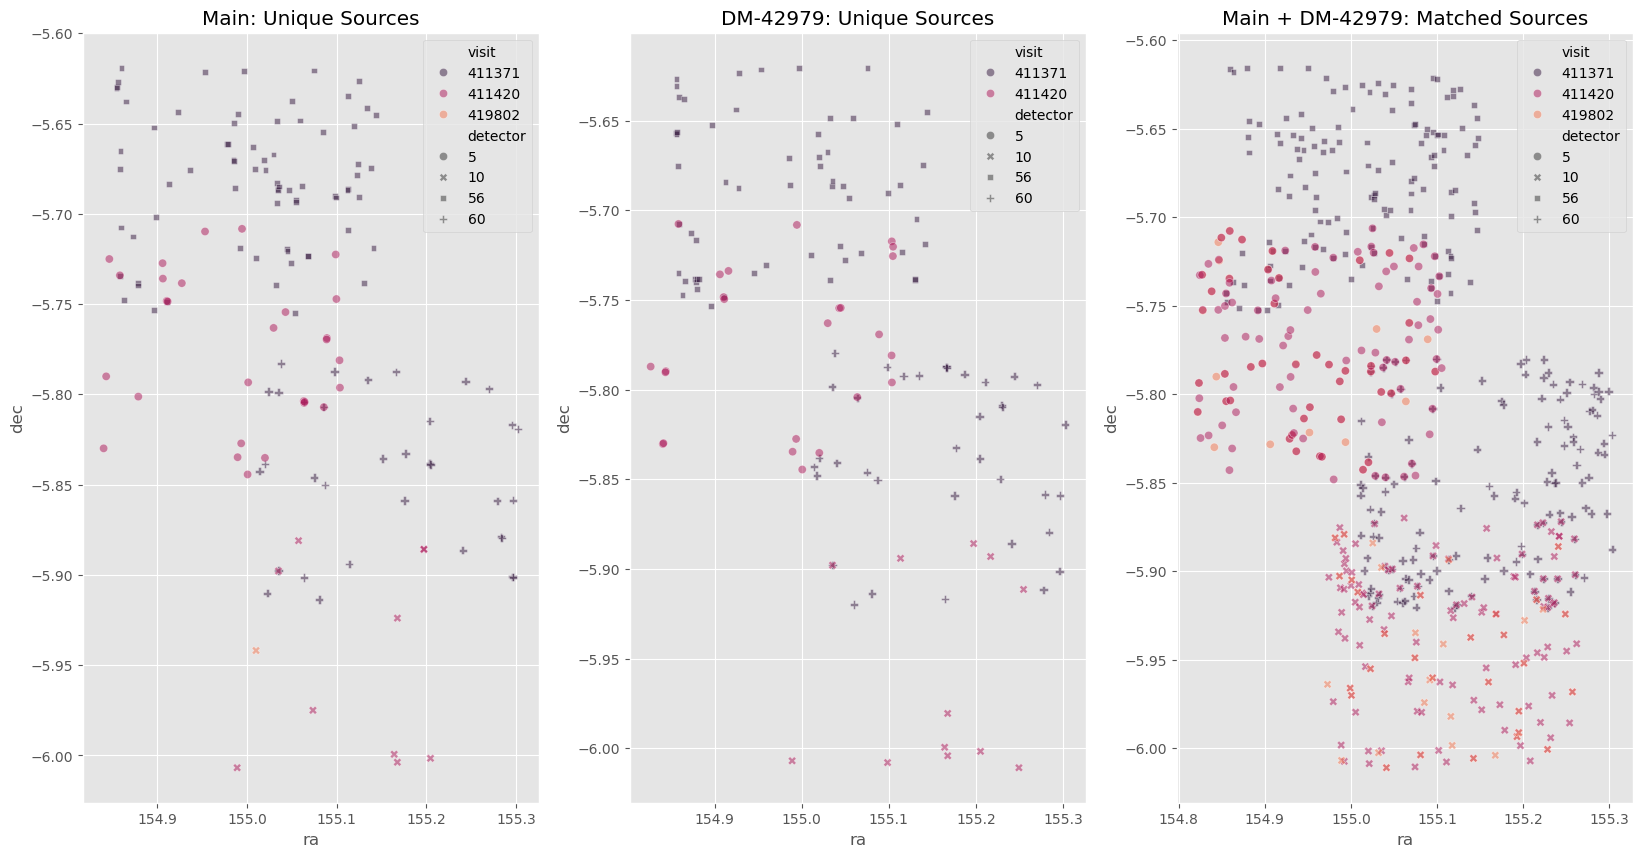

In [22]:
f, axes = plt.subplots(1, 3, figsize=(20,10))
sns.scatterplot(data=uniqueMain, x='ra', y='dec', hue='visit', style='detector', alpha=0.5, palette=sns.color_palette("rocket")[::2], ax=axes[0]).set(title=f'Main: Unique Sources');
sns.scatterplot(data=uniqueUpdated, x='ra', y='dec', hue='visit', style='detector', alpha=0.5, palette=sns.color_palette("rocket")[::2], ax=axes[1]).set(title=f'DM-42979: Unique Sources');
sns.scatterplot(data=matched, x='ra', y='dec', hue='visit', style='detector', alpha=0.5, palette=sns.color_palette("rocket")[::2], ax=axes[2]).set(title=f'Main + DM-42979: Matched Sources');


### 5. Image Cutouts

In [23]:
def creatingImageCutouts(sources, imageType, butler, outputPath):
    iscConfig = plotISC.PlotImageSubtractionCutoutsConfig()
    iscConfig.science_image_type=imageType
    iscTask = plotISC.PlotImageSubtractionCutoutsTask(output_path=outputPath, config=iscConfig)
    iscRun = iscTask.run(sources, butler)

In [24]:
outputPathMain = '/Users/audrey/Documents/LSST/code/ap_verify-runs/DECam/d_2024_09_30/repo/cutoutOutputs'
outputPathUpdated = '/Users/audrey/Documents/LSST/code/ap_verify-runs/DECam/d_2024_09_30-DM42979/repo/cutoutOutputs'

In [25]:
# creatingImageCutouts(main_run['rsrcTable'] , 'initial_pvi', butler_main, outputPathMain)

In [26]:
# creatingImageCutouts(updated_run['rsrcTable'] , 'initial_pvi', butler_updated, outputPathUpdated)

### 6. Visualizing Flags

In [27]:
flagList = ['pixelFlags_bad', 'pixelFlags_crCenter', 'pixelFlags_interpolatedCenter', 'pixelFlags_saturatedCenter', 
            'pixelFlags_suspectCenter', 'pixelFlags_streakCenter', 'pixelFlags_injectedCenter', 'pixelFlags_injected_templateCenter']

In [28]:
def visualFlagComparison(mainRun, updatedRun, status):
    for flag in flagList:
        main = mainRun['rsrcTable'][mainRun['rsrcTable'][flag]==status]
        updated = updatedRun['rsrcTable'][updatedRun['rsrcTable'][flag]==status]

        if status==True:
            sameSources = []
            for m, u in zip(main['diaSourceId'], updated['diaSourceId']):
                if m==u:
                    sameSources.append(u)
            
            if len(sameSources)>1:
                print(f'{flag} contains overlapping sourceIds: {sameSources}\n')
            
        if len(main)>1 or len(updated)>1:
            f, axes = plt.subplots(1, 2, figsize=(20,10))
            sns.scatterplot(data=main, x='ra', y='dec', hue='visit', style='detector', palette=sns.color_palette("rocket")[::2], alpha=0.5, ax=axes[0]).set(title=f'Main: {flag} = {status}')
            sns.scatterplot(data=updated, x='ra', y='dec', hue='visit', style='detector', palette=sns.color_palette("rocket")[::2], alpha=0.5, ax=axes[1]).set(title=f'Updated: {flag} = {status}')

pixelFlags_suspectCenter contains overlapping sourceIds: [88341369835225090, 88341369835225091, 88341369835225093]



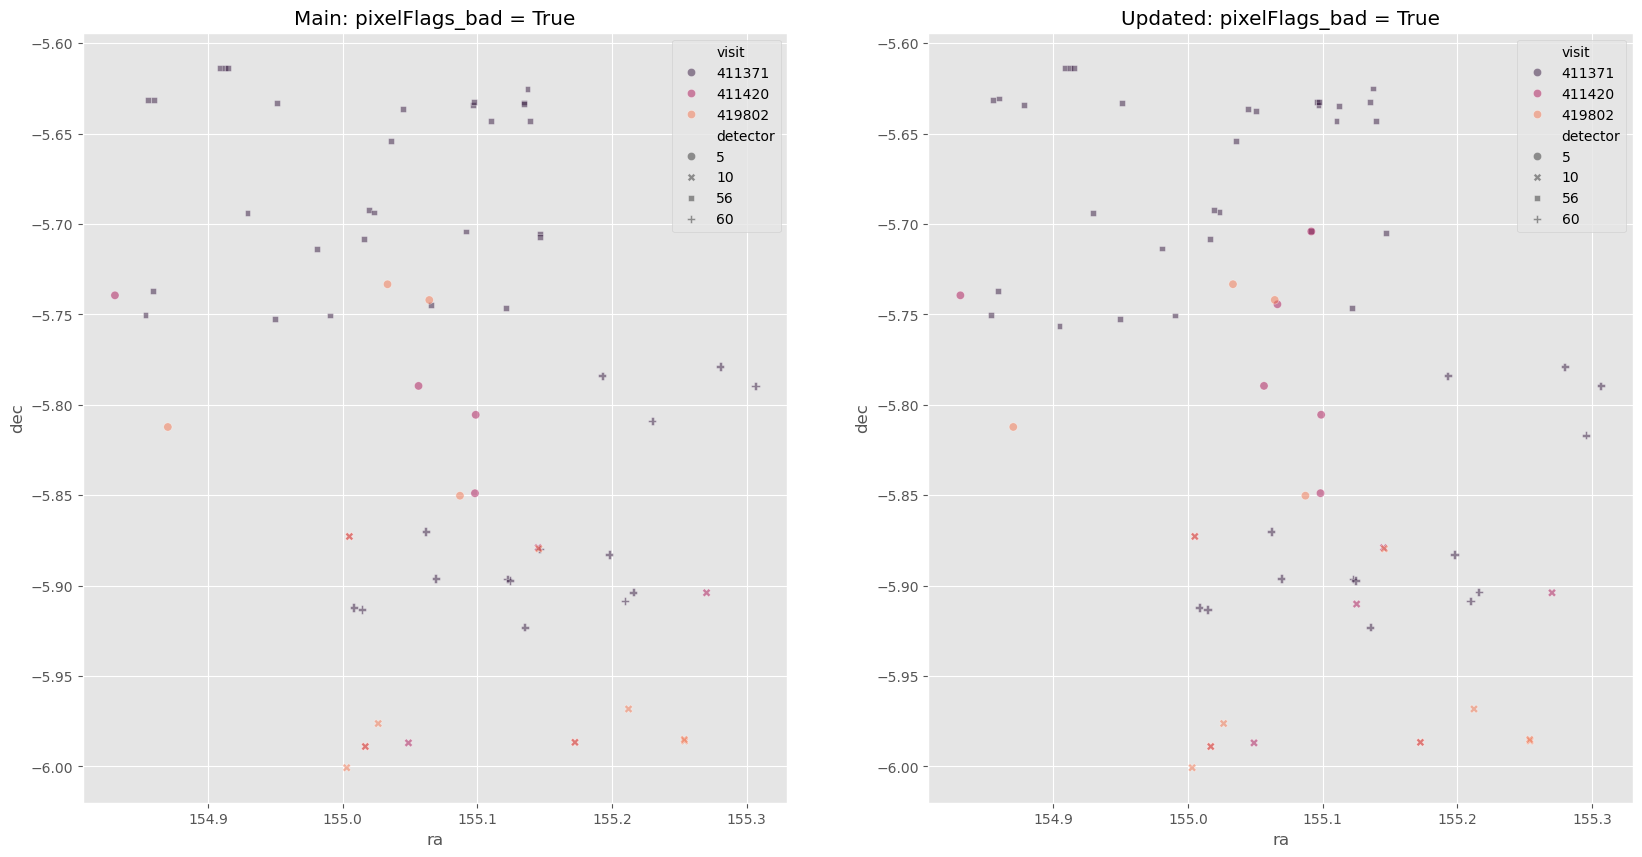

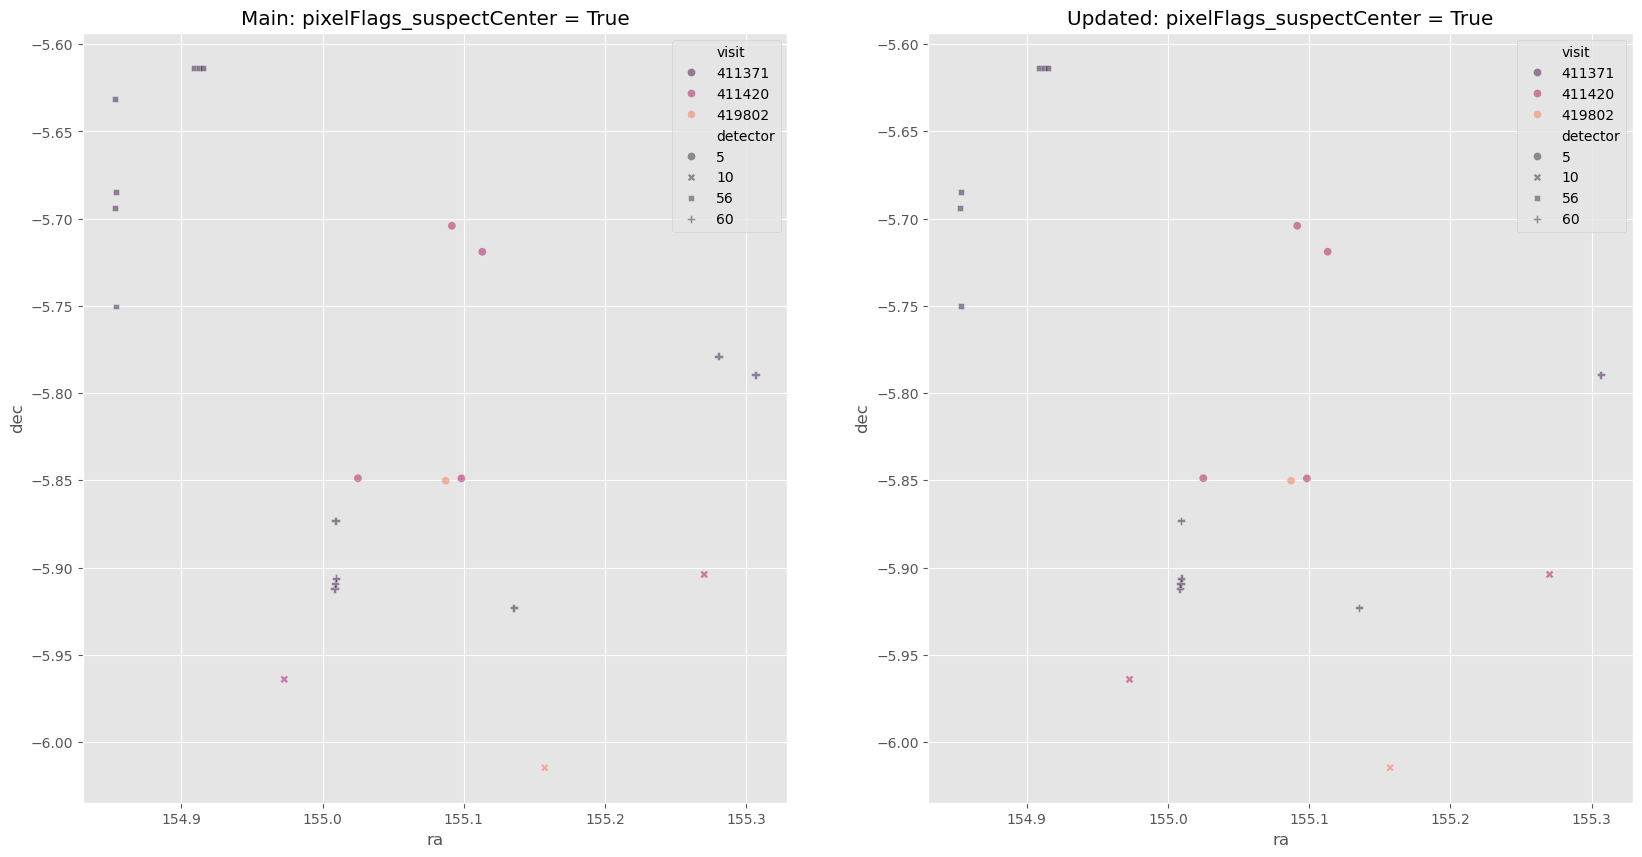

In [29]:
visualFlagComparison(main_run, updated_run, True)

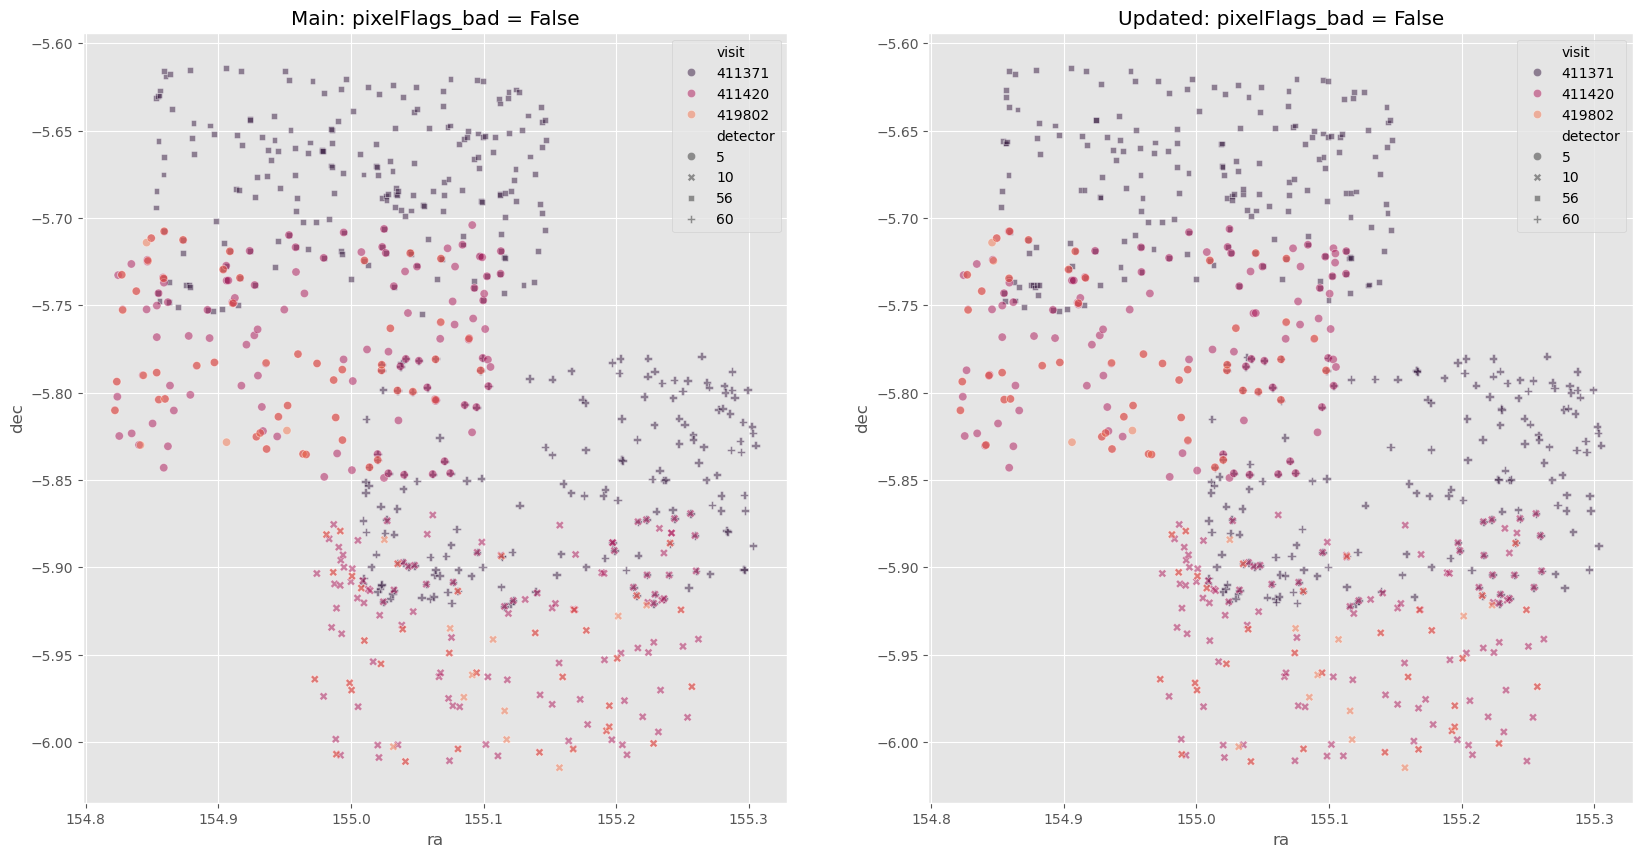

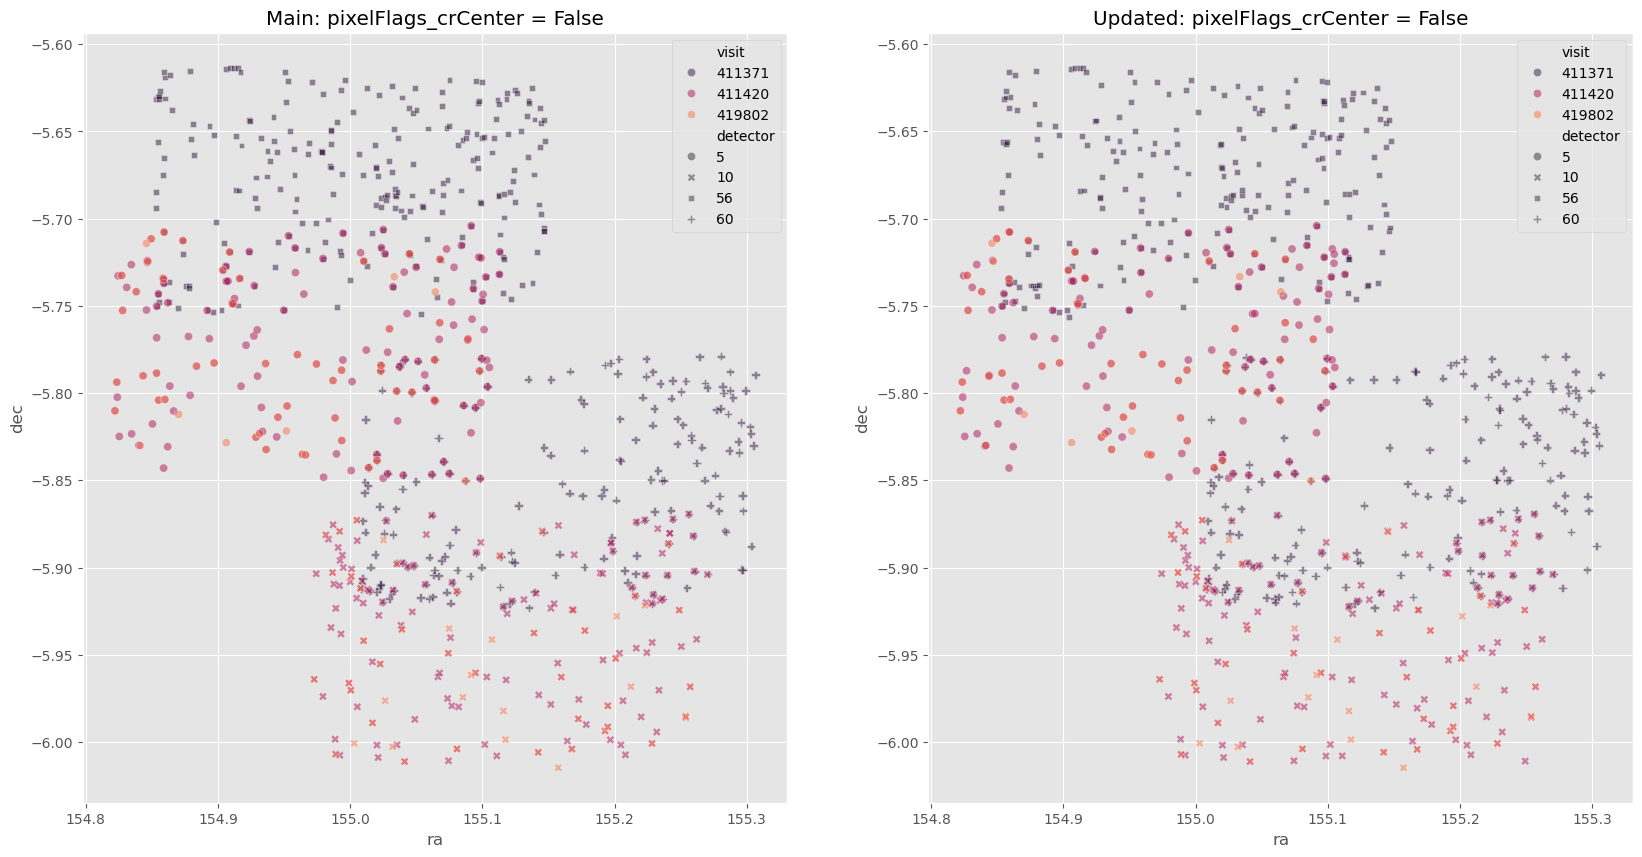

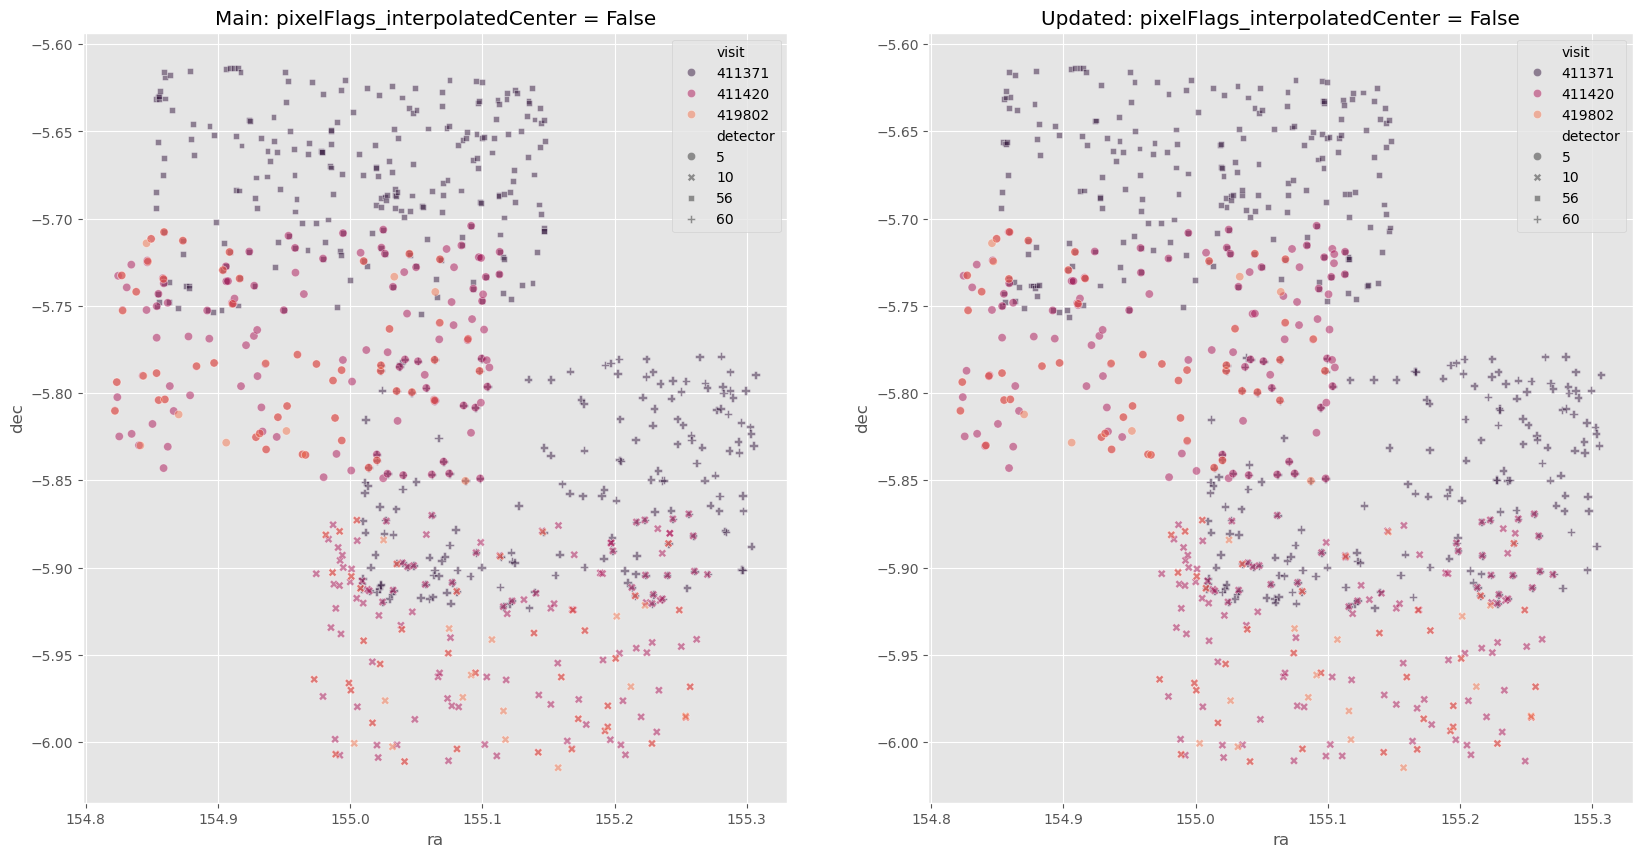

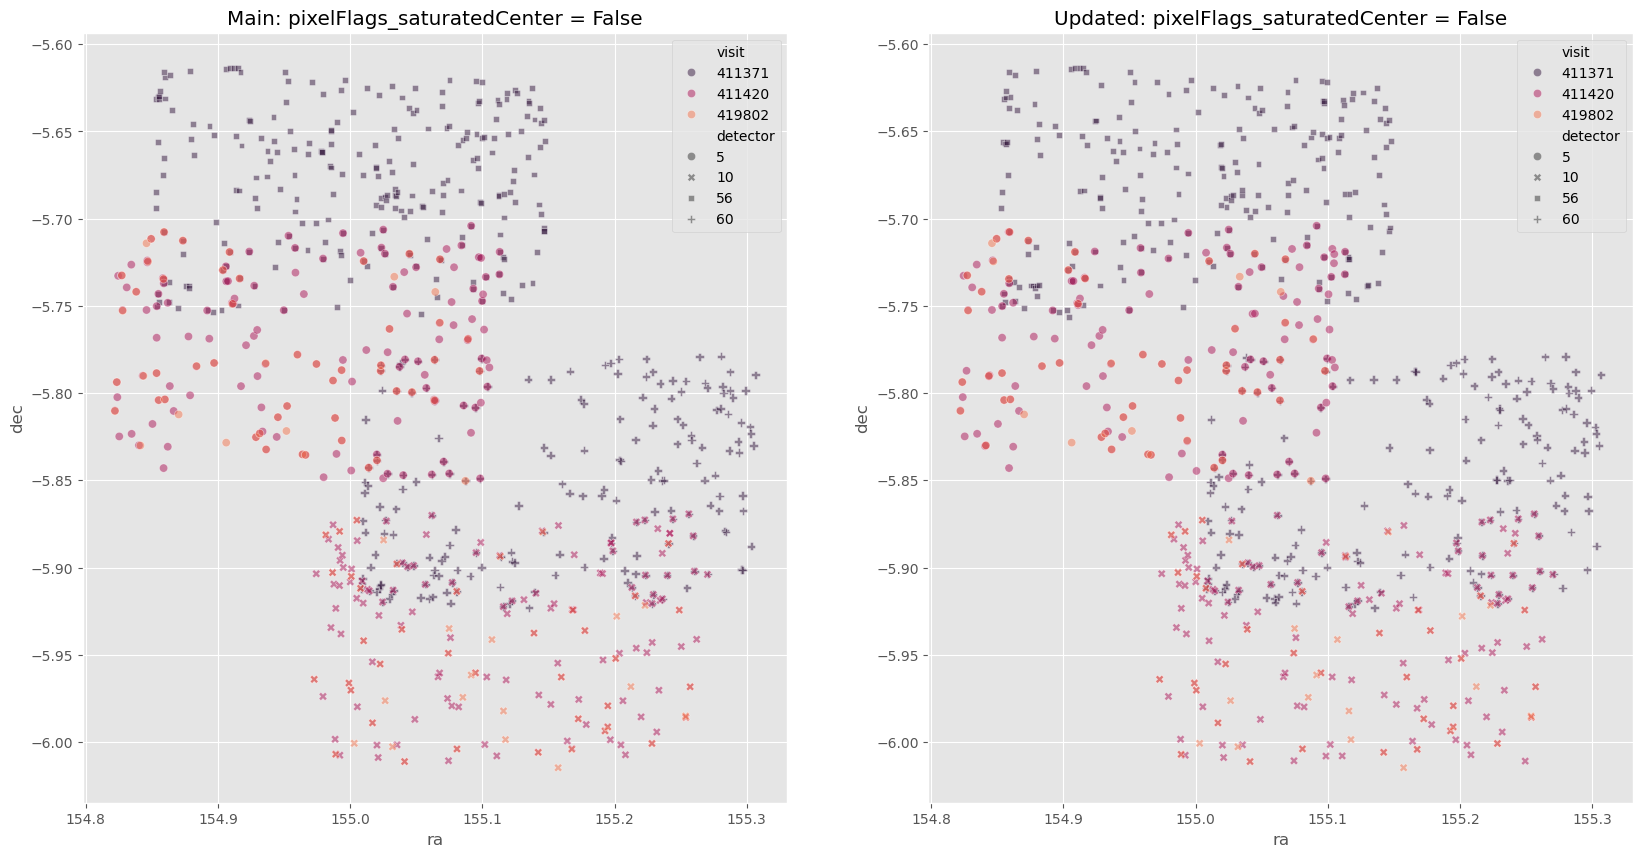

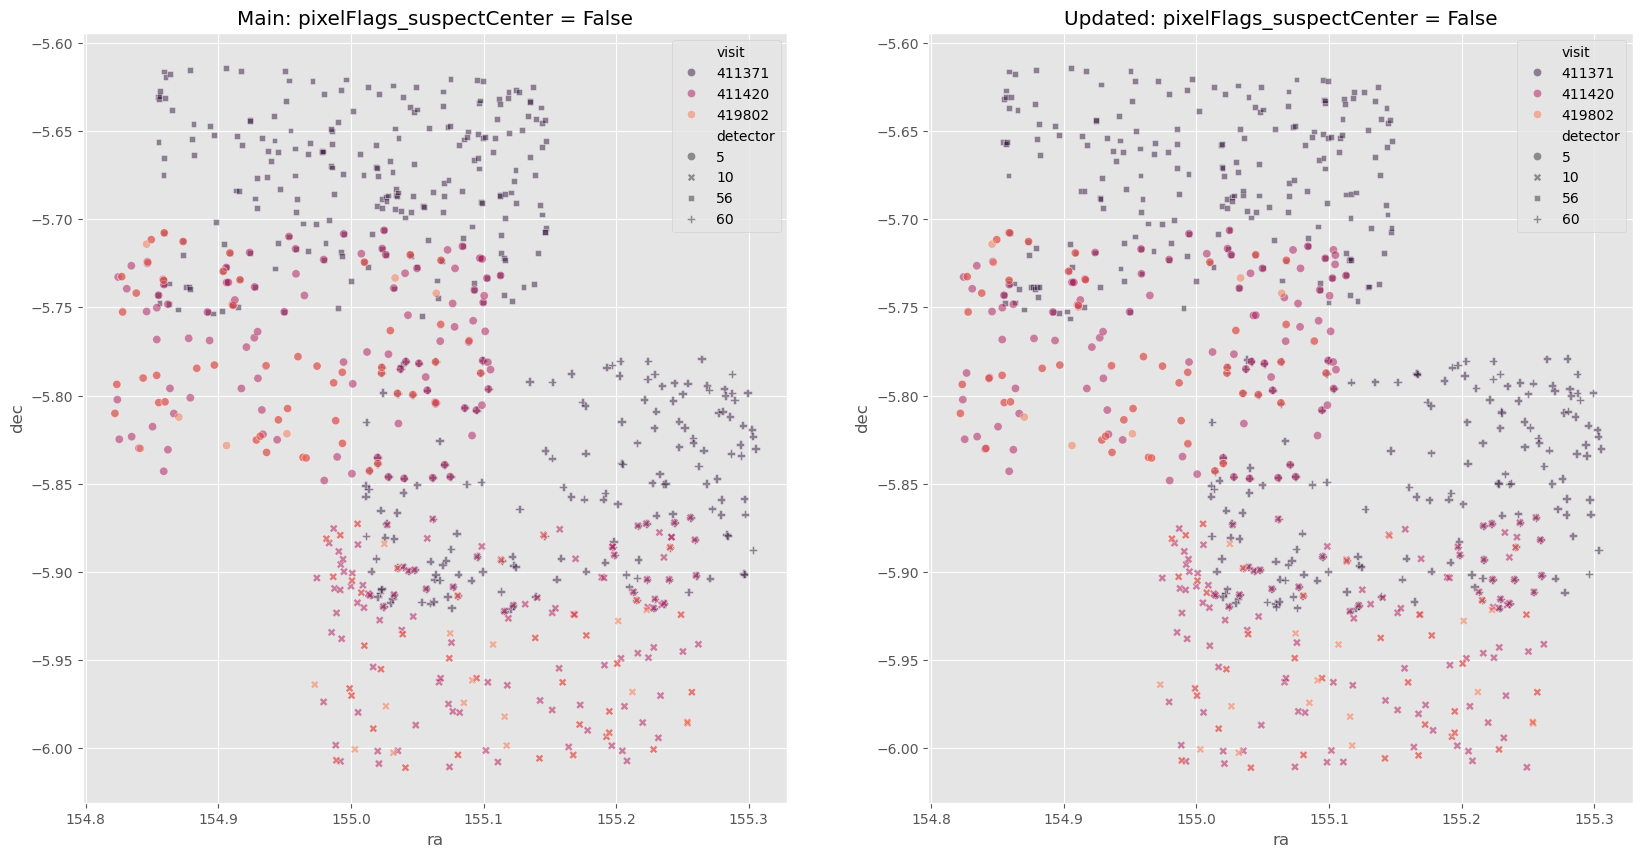

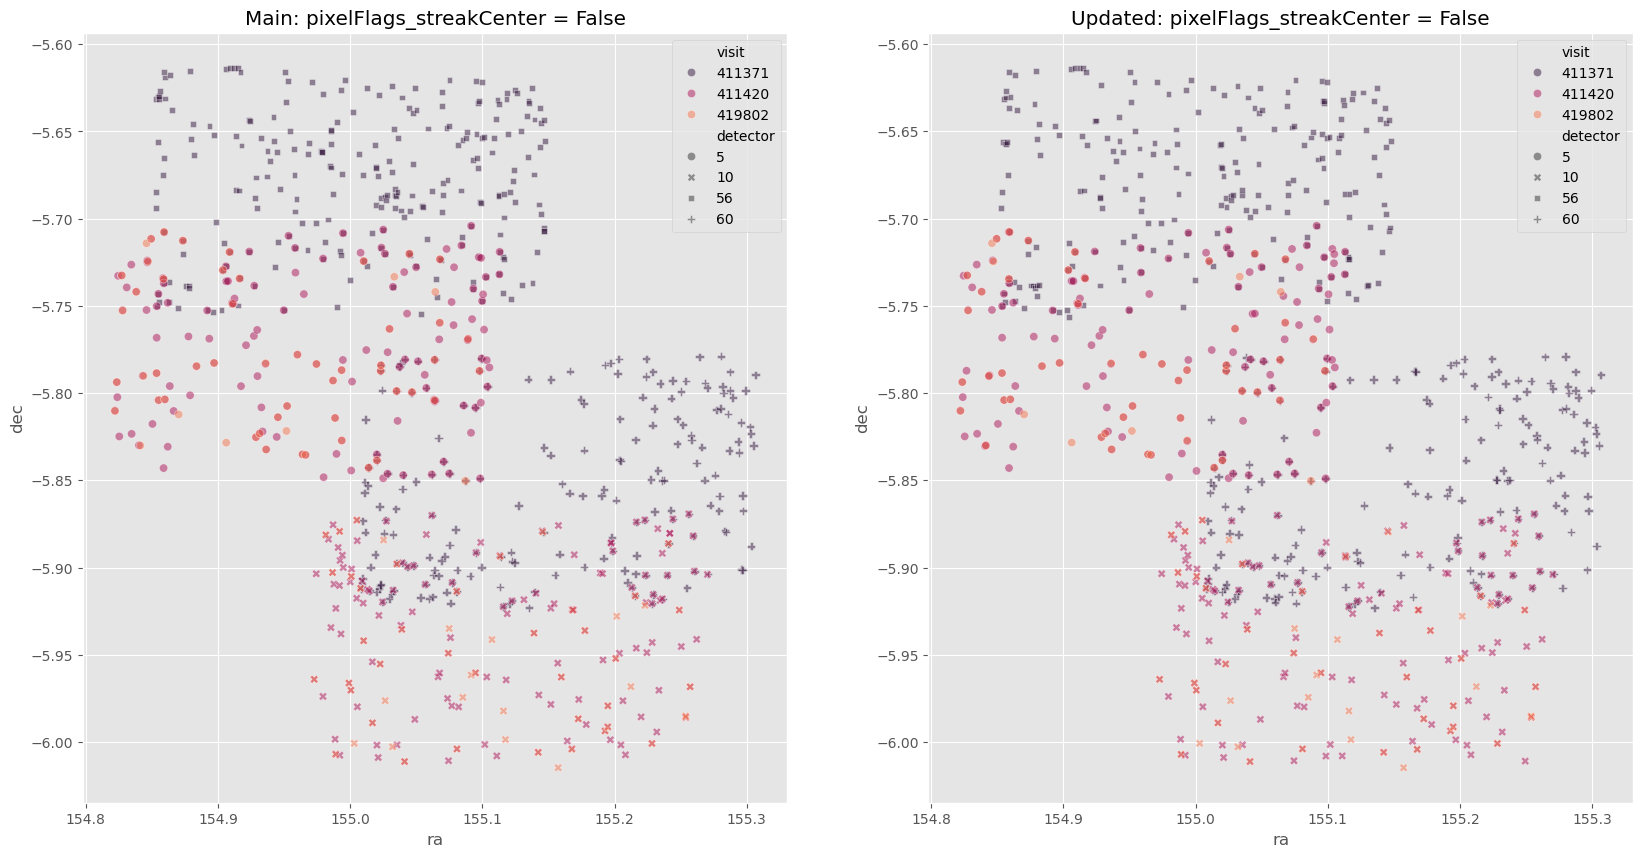

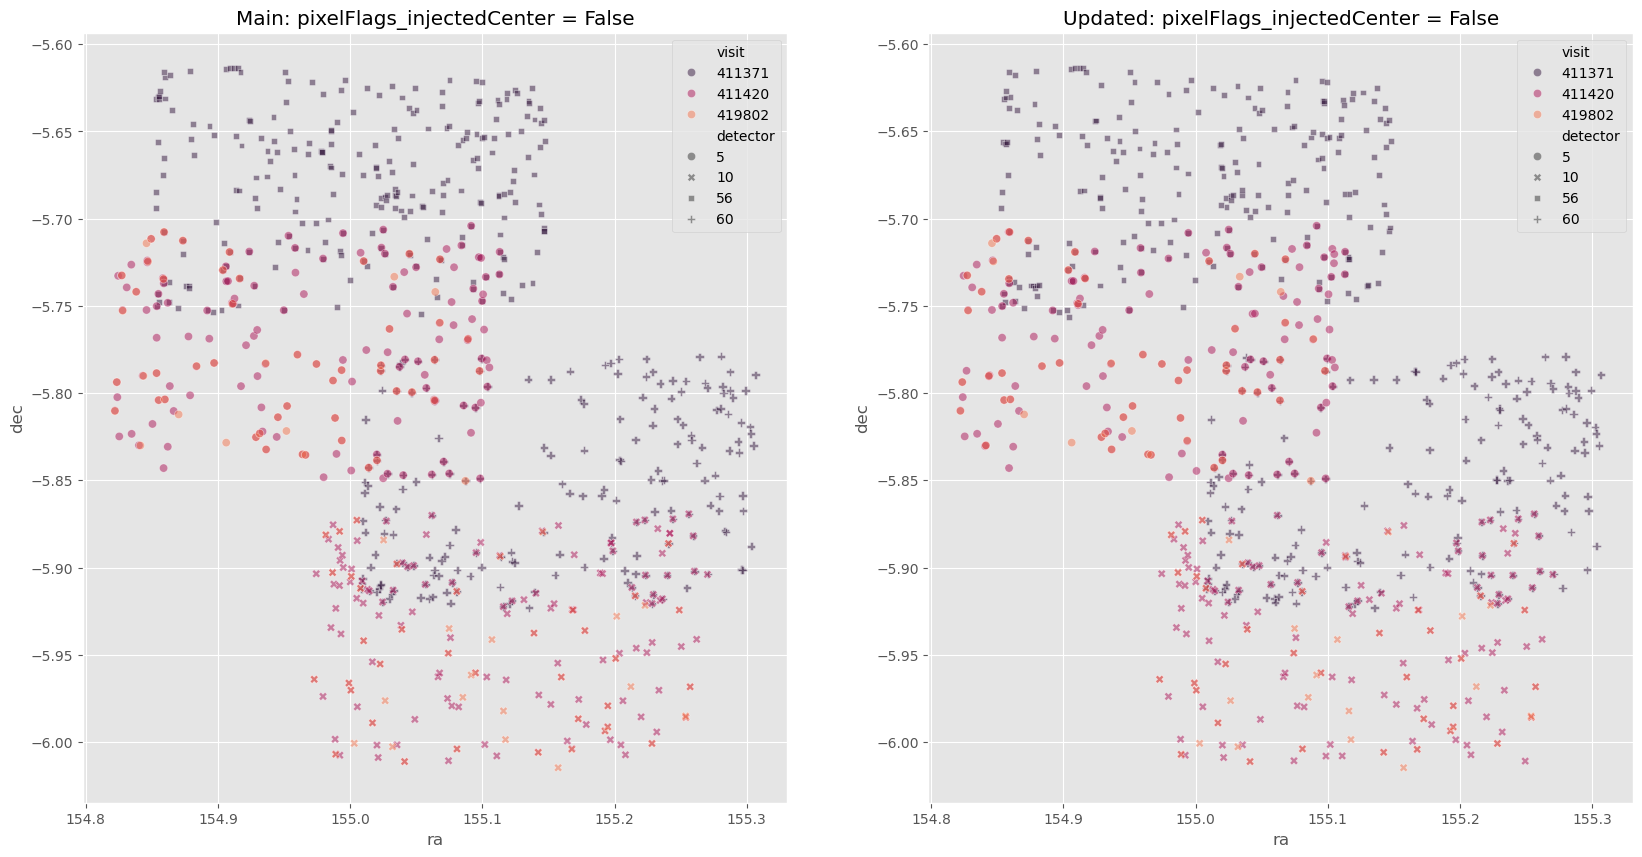

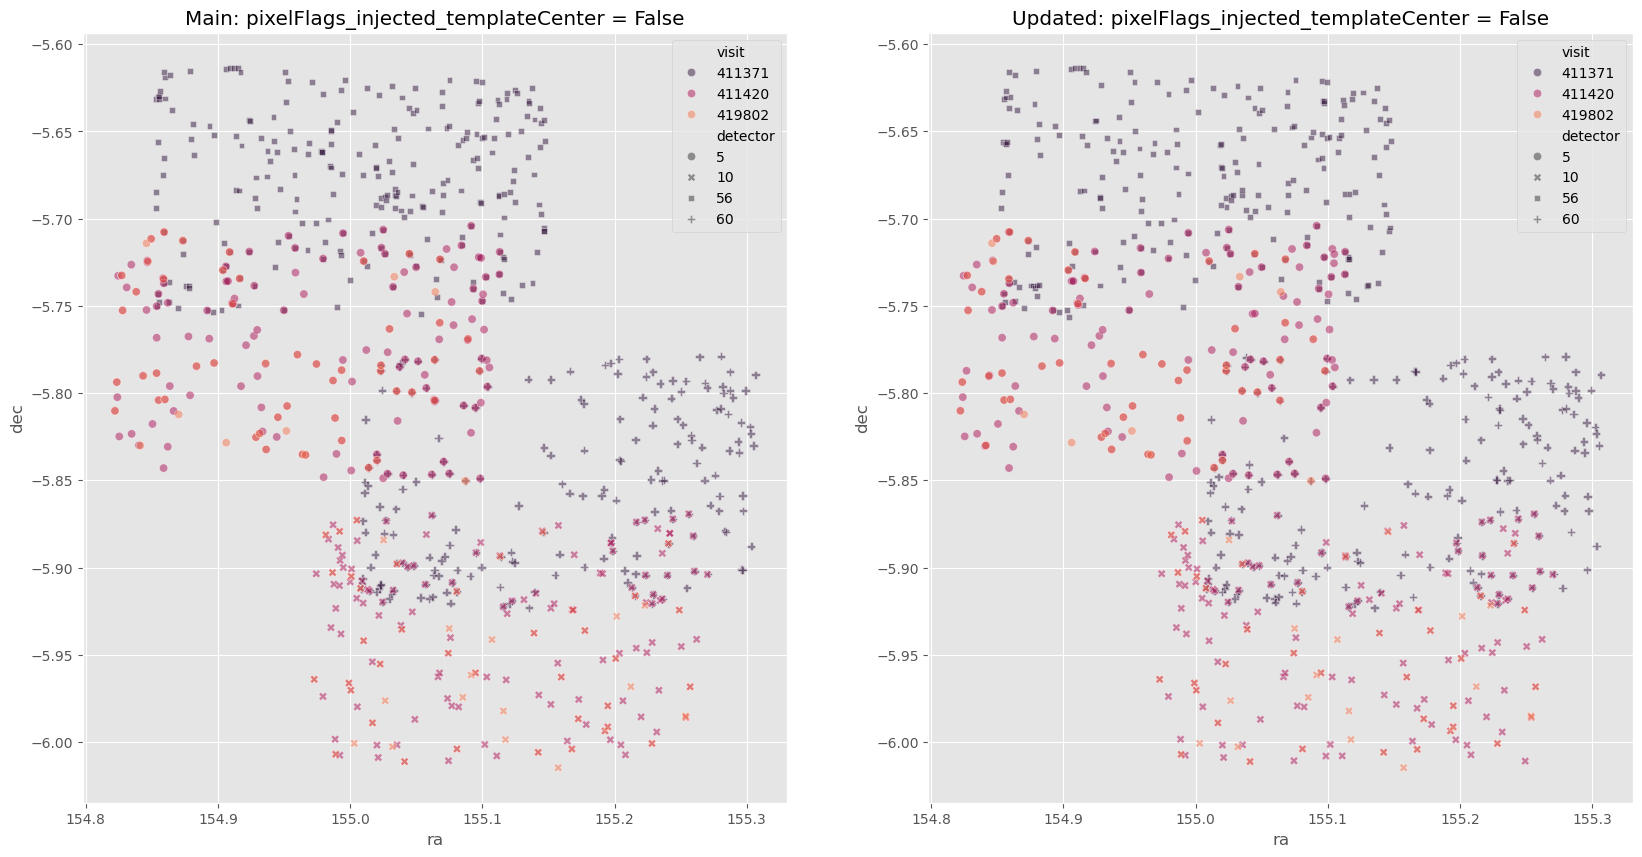

In [30]:
visualFlagComparison(main_run, updated_run, False)

In [31]:
def flagComparison(mainRun, updatedRun):
    for flag in flagList:
        f, axes = plt.subplots(1, 2, figsize=(20,10))
        sns.scatterplot(data=mainRun['rsrcTable'], x='ra', y='dec', hue='visit', size='detector', style=flag, palette=sns.color_palette("rocket")[::2], alpha=0.5, ax=axes[0]).set(title=f'Main: {flag}')
        sns.scatterplot(data=updatedRun['rsrcTable'], x='ra', y='dec', hue='visit', size='detector', style=flag, palette=sns.color_palette("rocket")[::2], alpha=0.5, ax=axes[1]).set(title=f'DM-42979: {flag}')

        f, axes = plt.subplots(1, 3, figsize=(20,10))
        sns.scatterplot(data=mainRun['rsrcTable'], x='ra', y='dec', color=sns.color_palette("rocket")[1], marker='x', alpha=1.0, ax=axes[0]).set(title=f'Main: {flag}')
        sns.scatterplot(data=updatedRun['rsrcTable'], x='ra', y='dec', color=sns.color_palette("rocket")[3], marker='o', alpha=0.5, ax=axes[1]).set(title=f'DM-42979: {flag}')
        sns.scatterplot(data=mainRun['rsrcTable'], x='ra', y='dec', color=sns.color_palette("rocket")[1], marker='x', alpha=1.0, ax=axes[2]).set(title=f'Main + DM-42979: {flag}')
        sns.scatterplot(data=updatedRun['rsrcTable'], x='ra', y='dec', color=sns.color_palette("rocket")[3], marker='o', alpha=0.5, ax=axes[2])




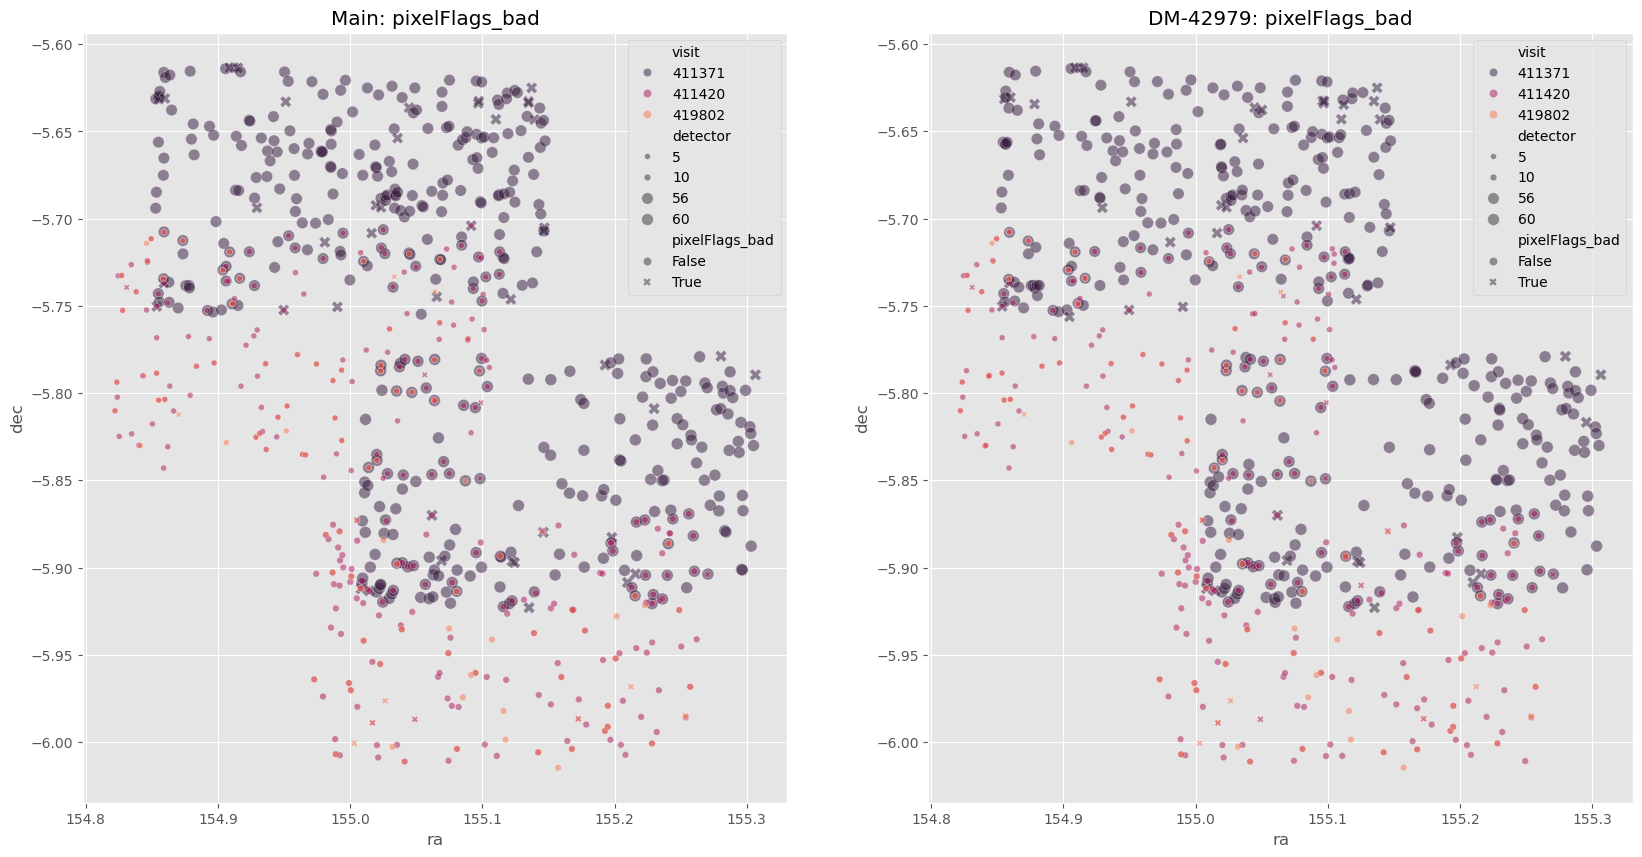

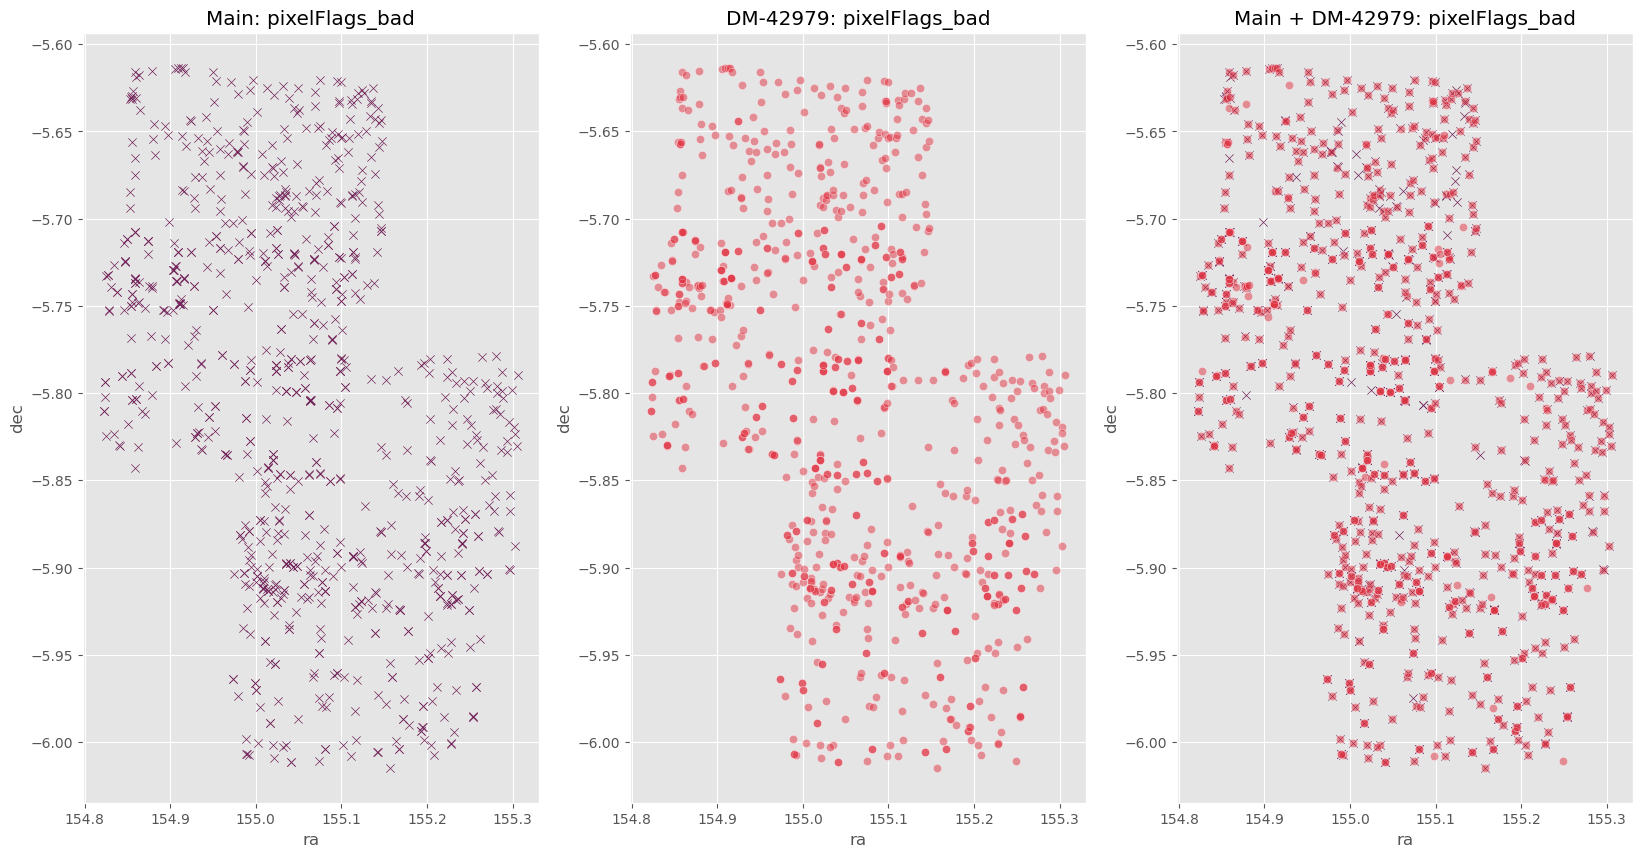

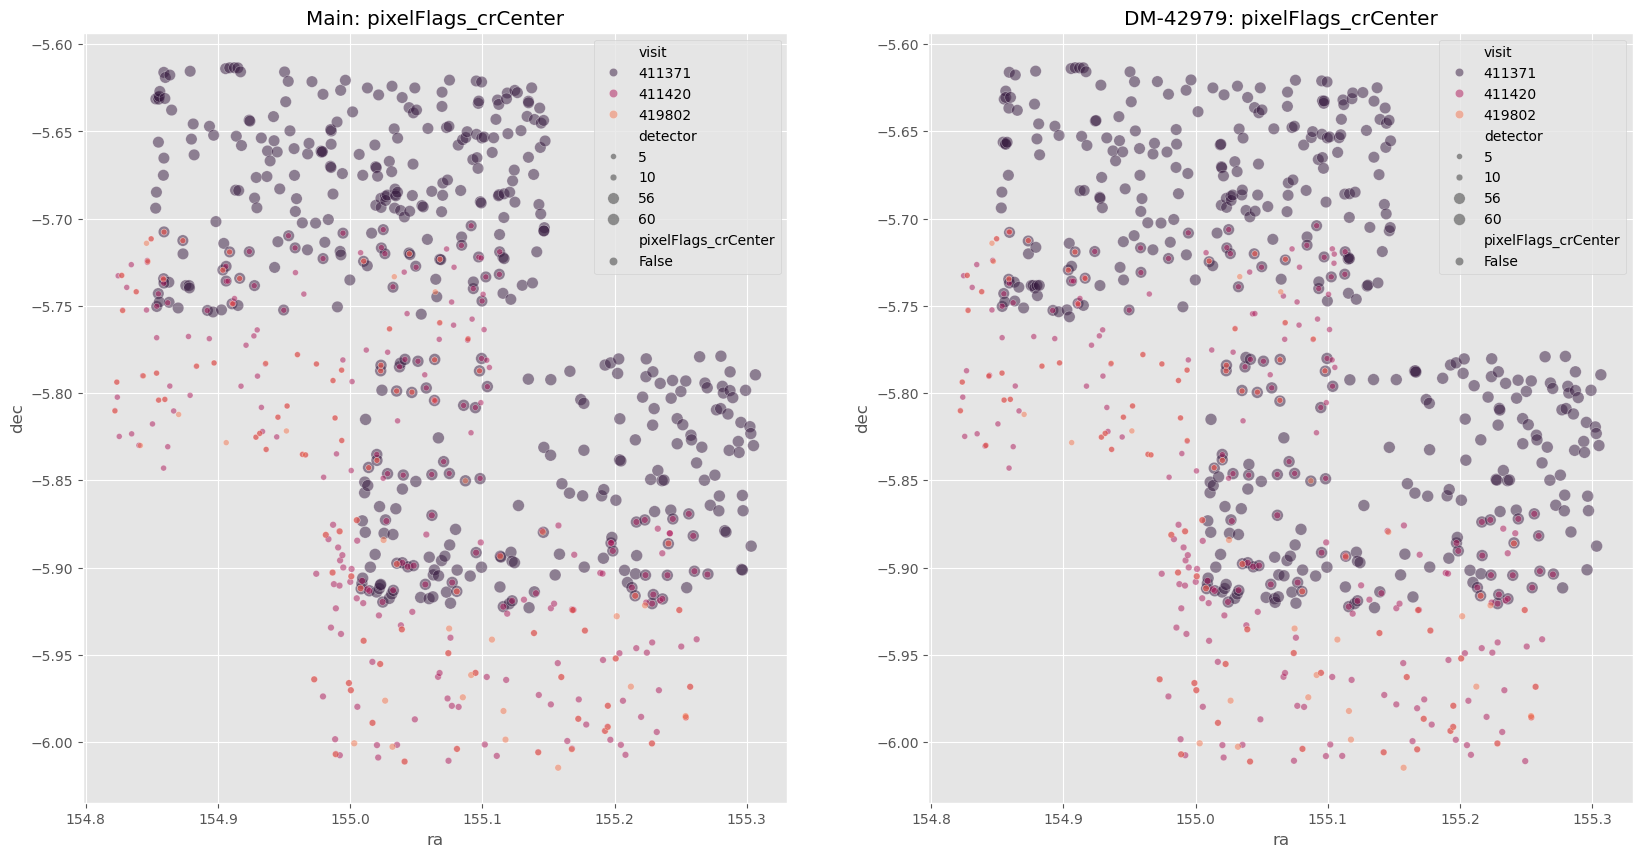

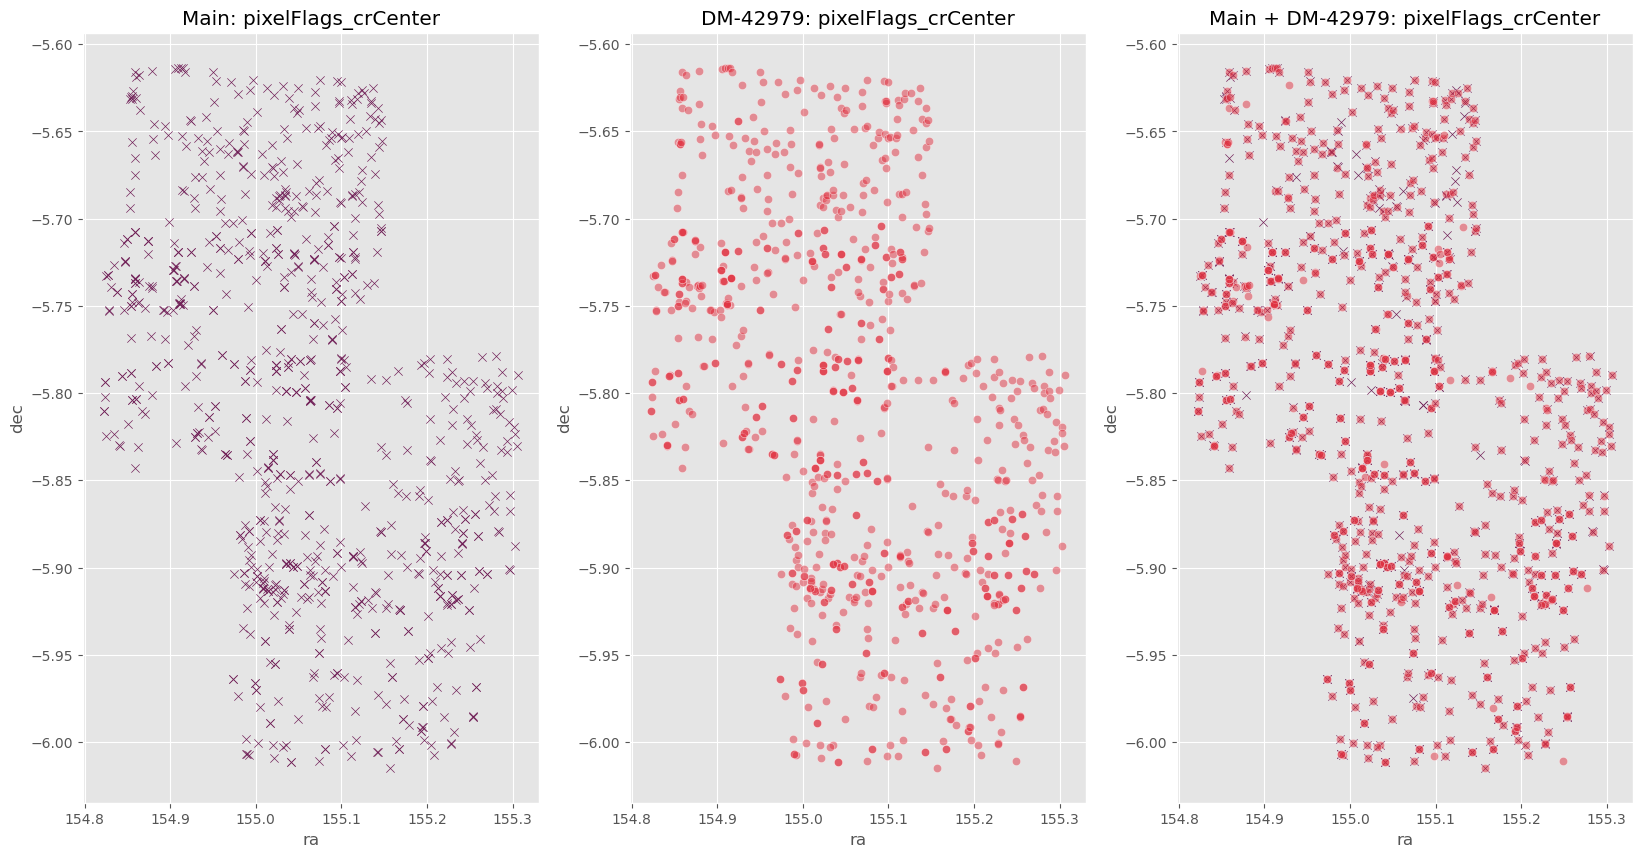

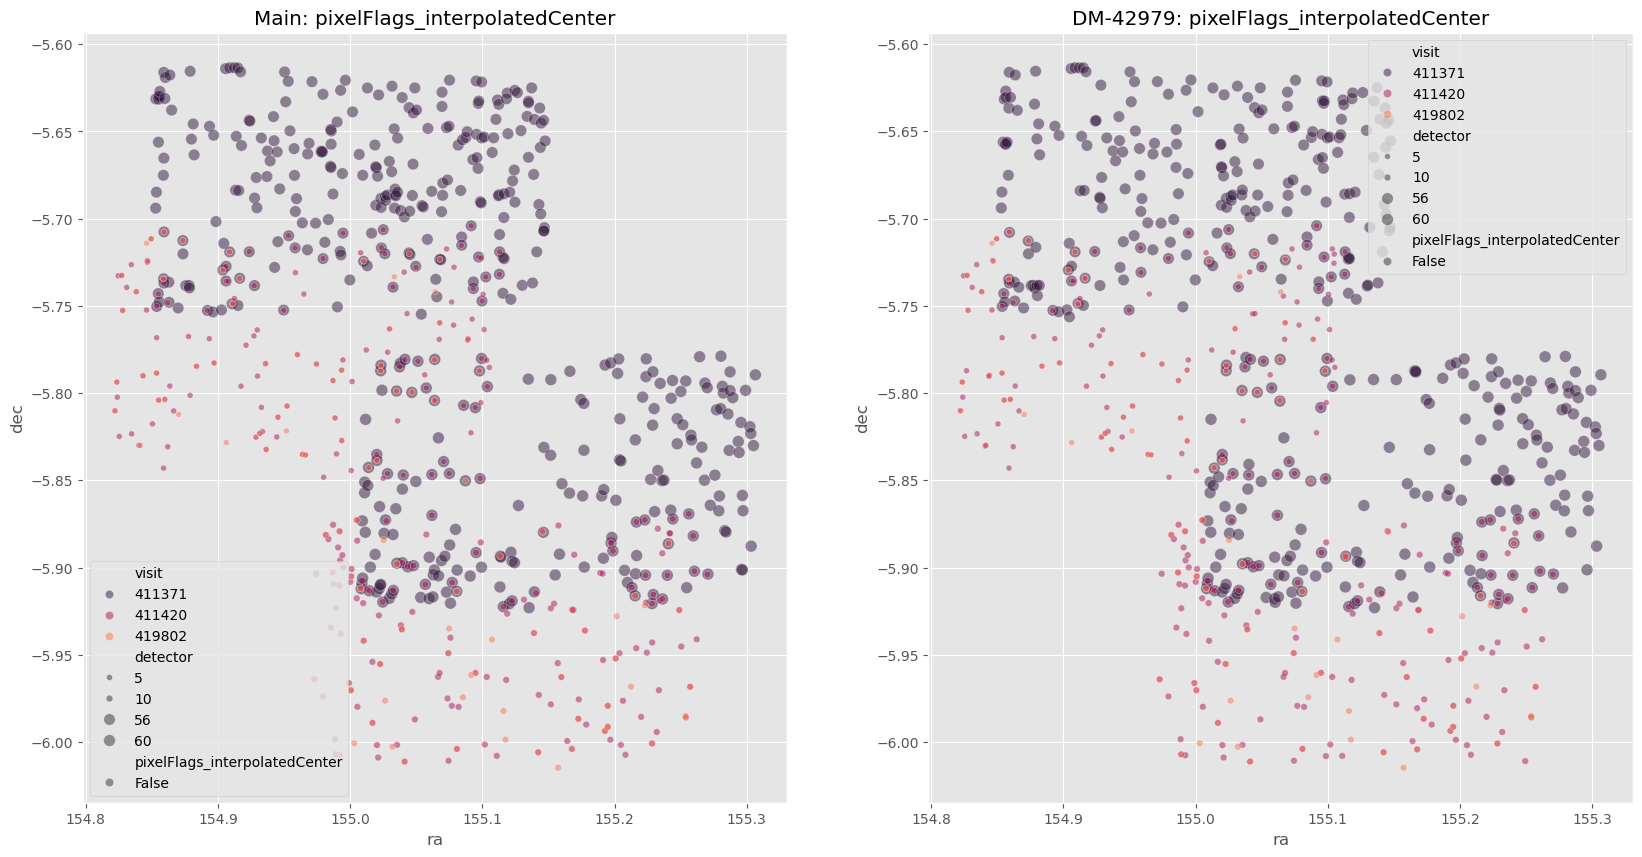

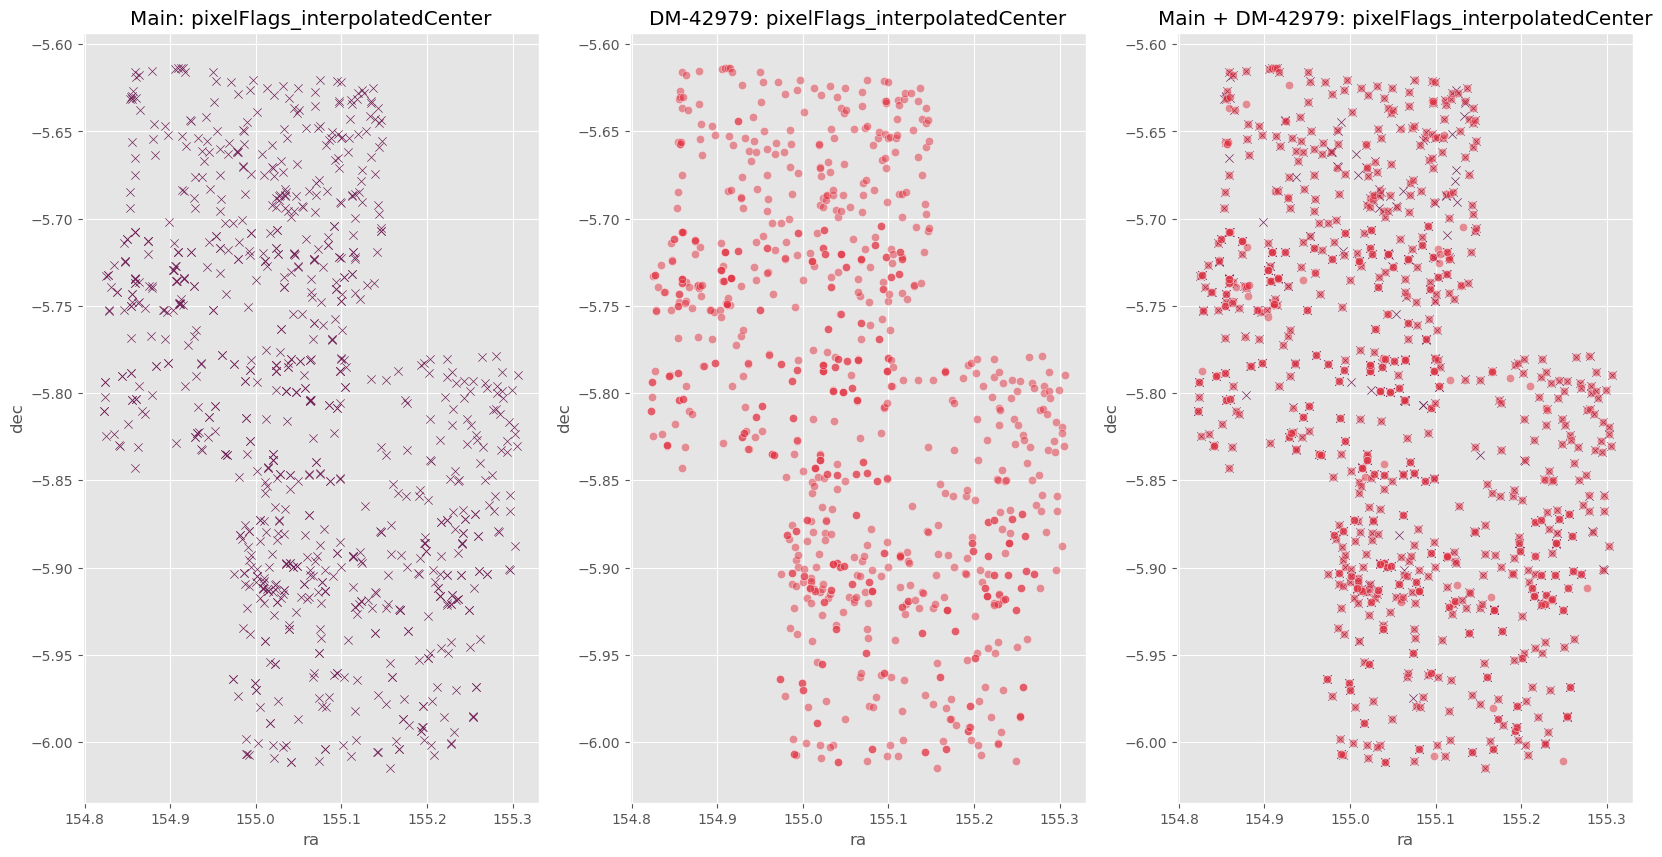

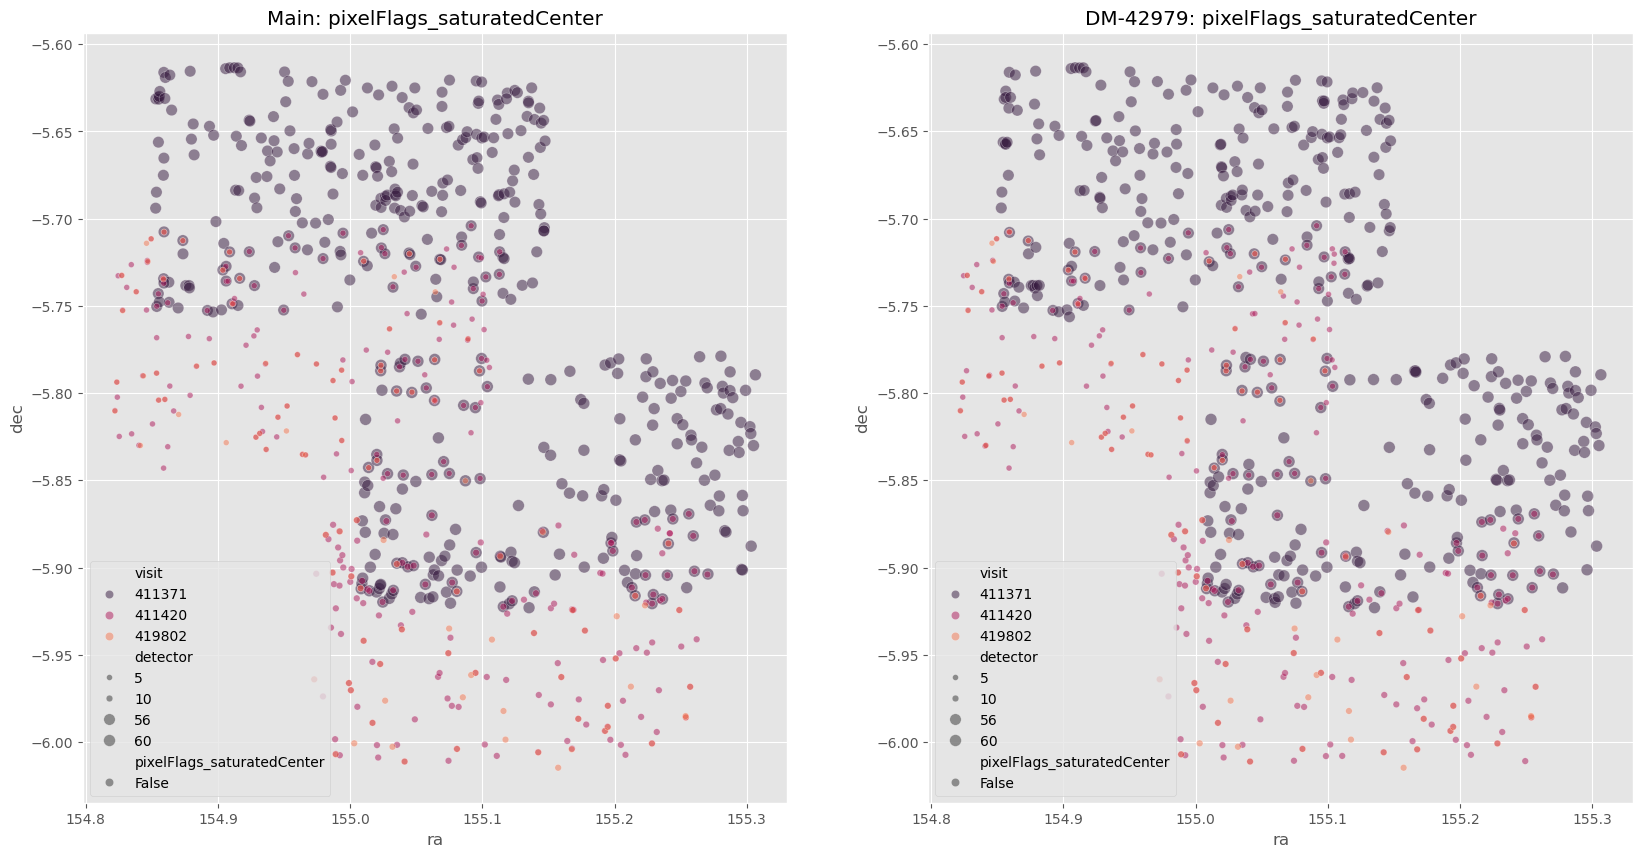

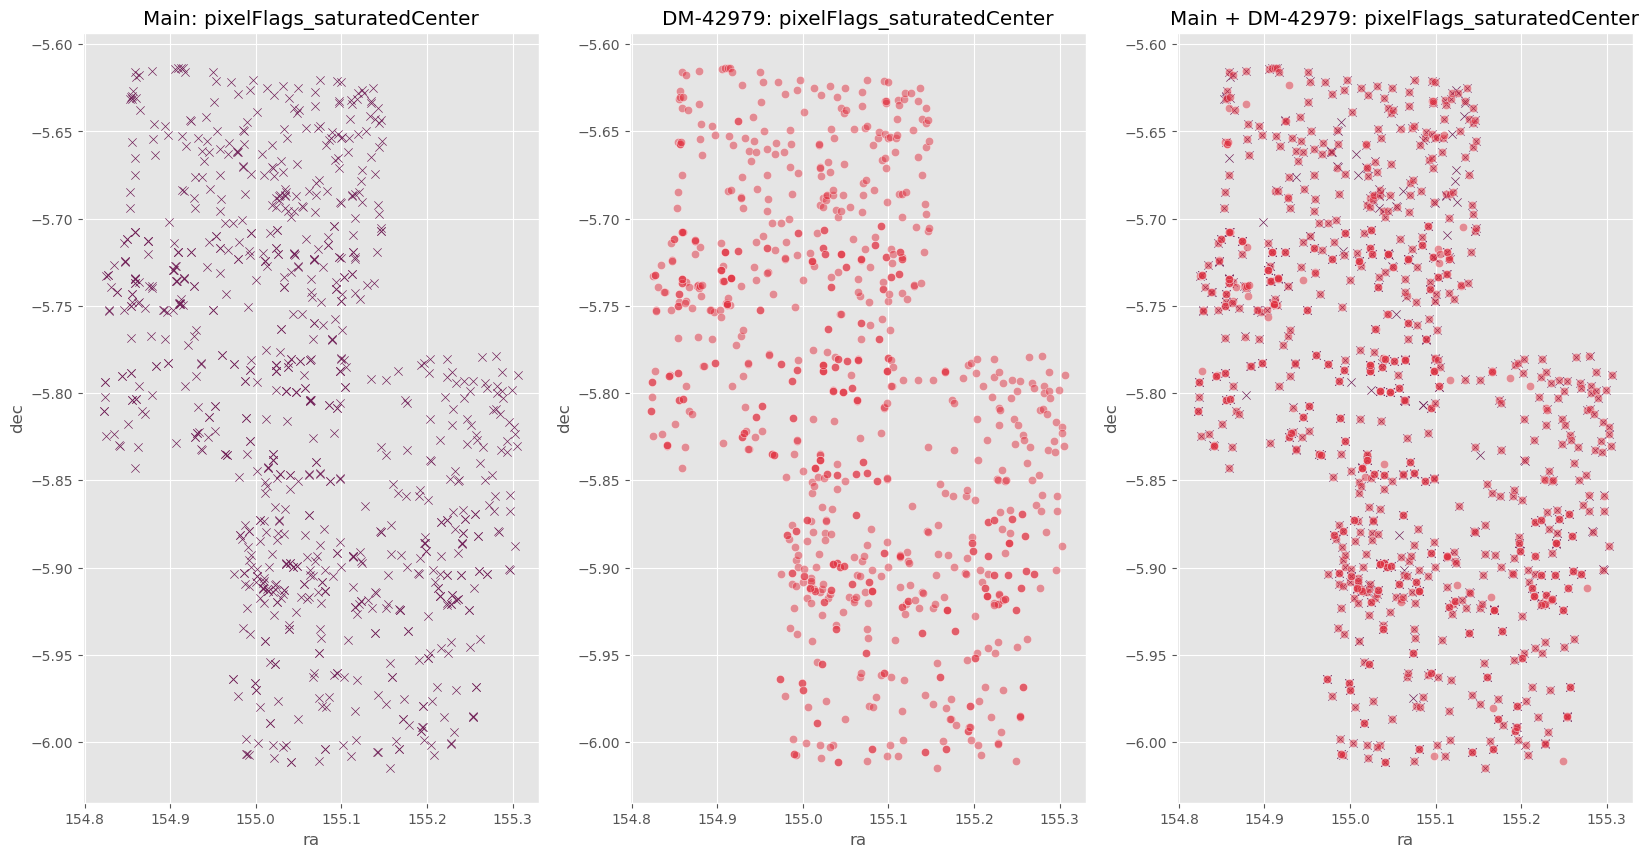

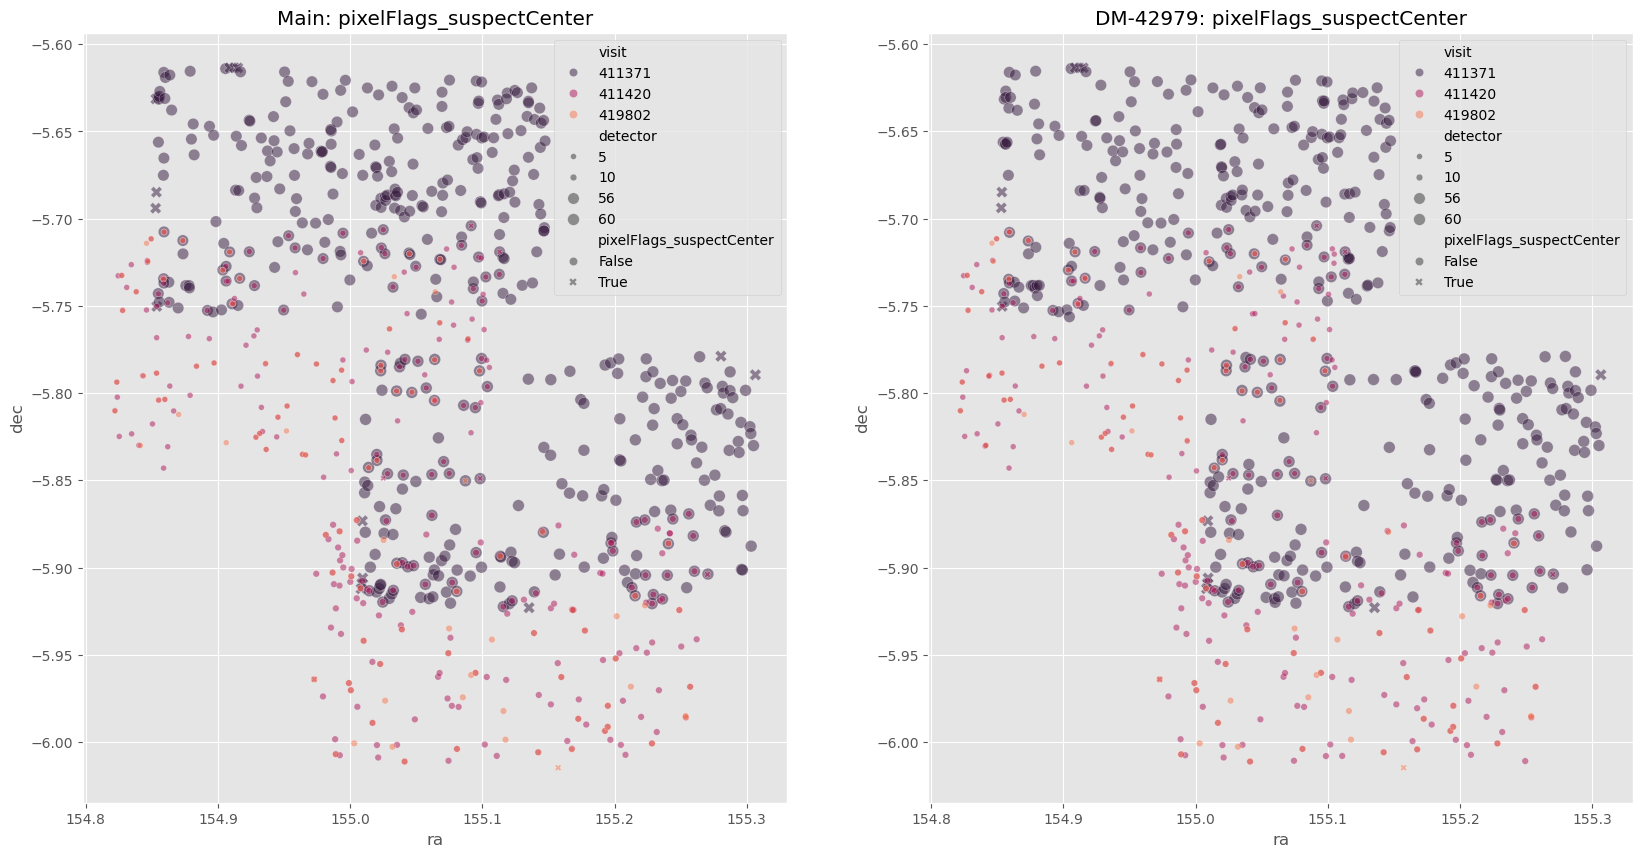

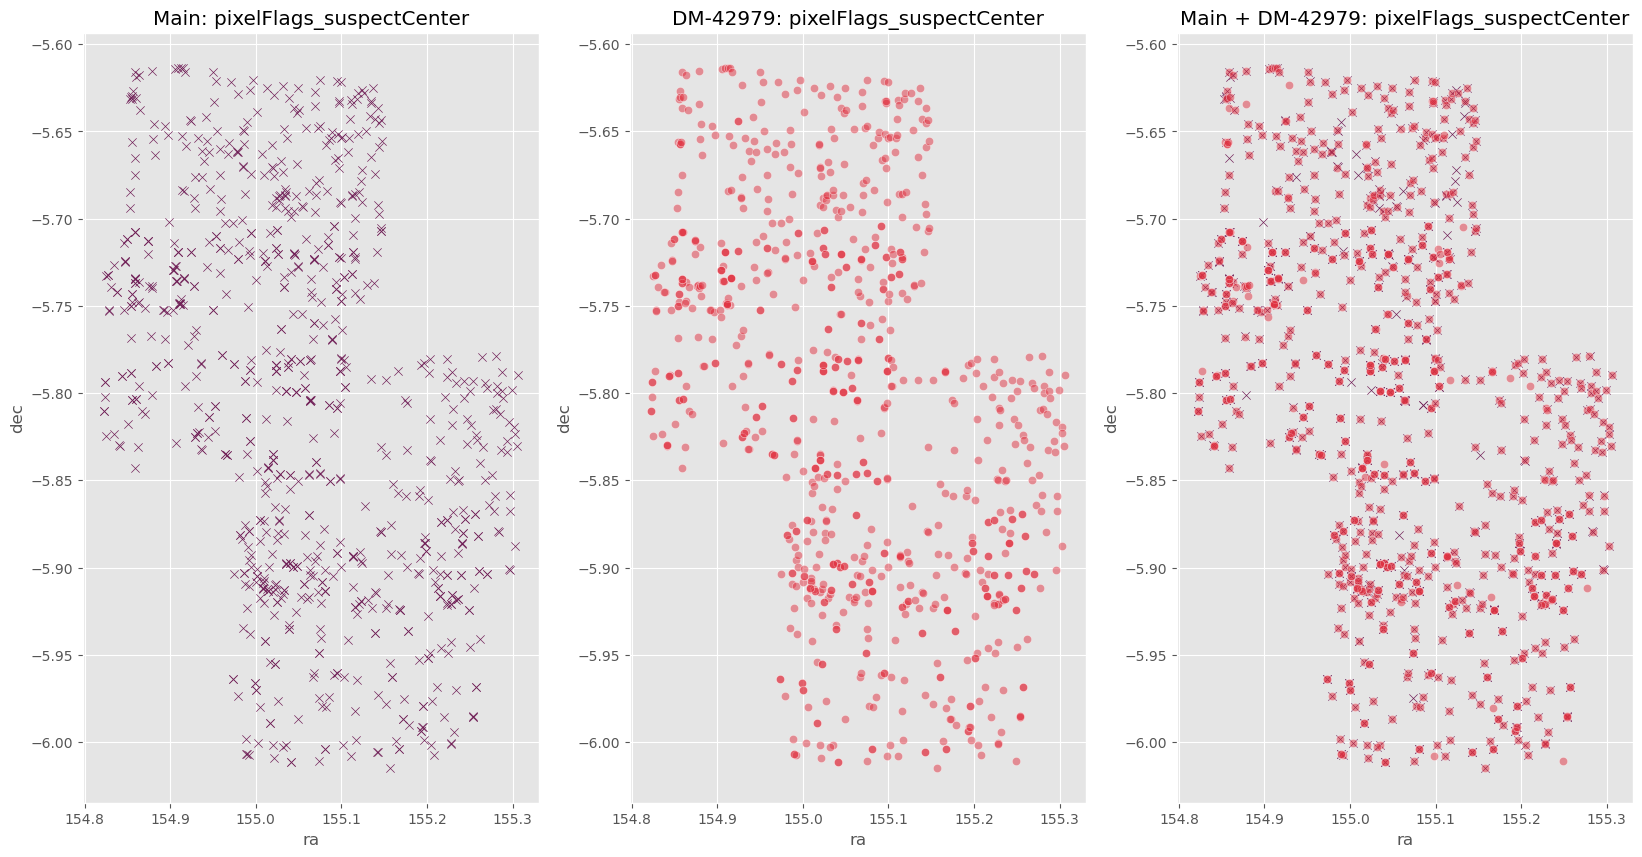

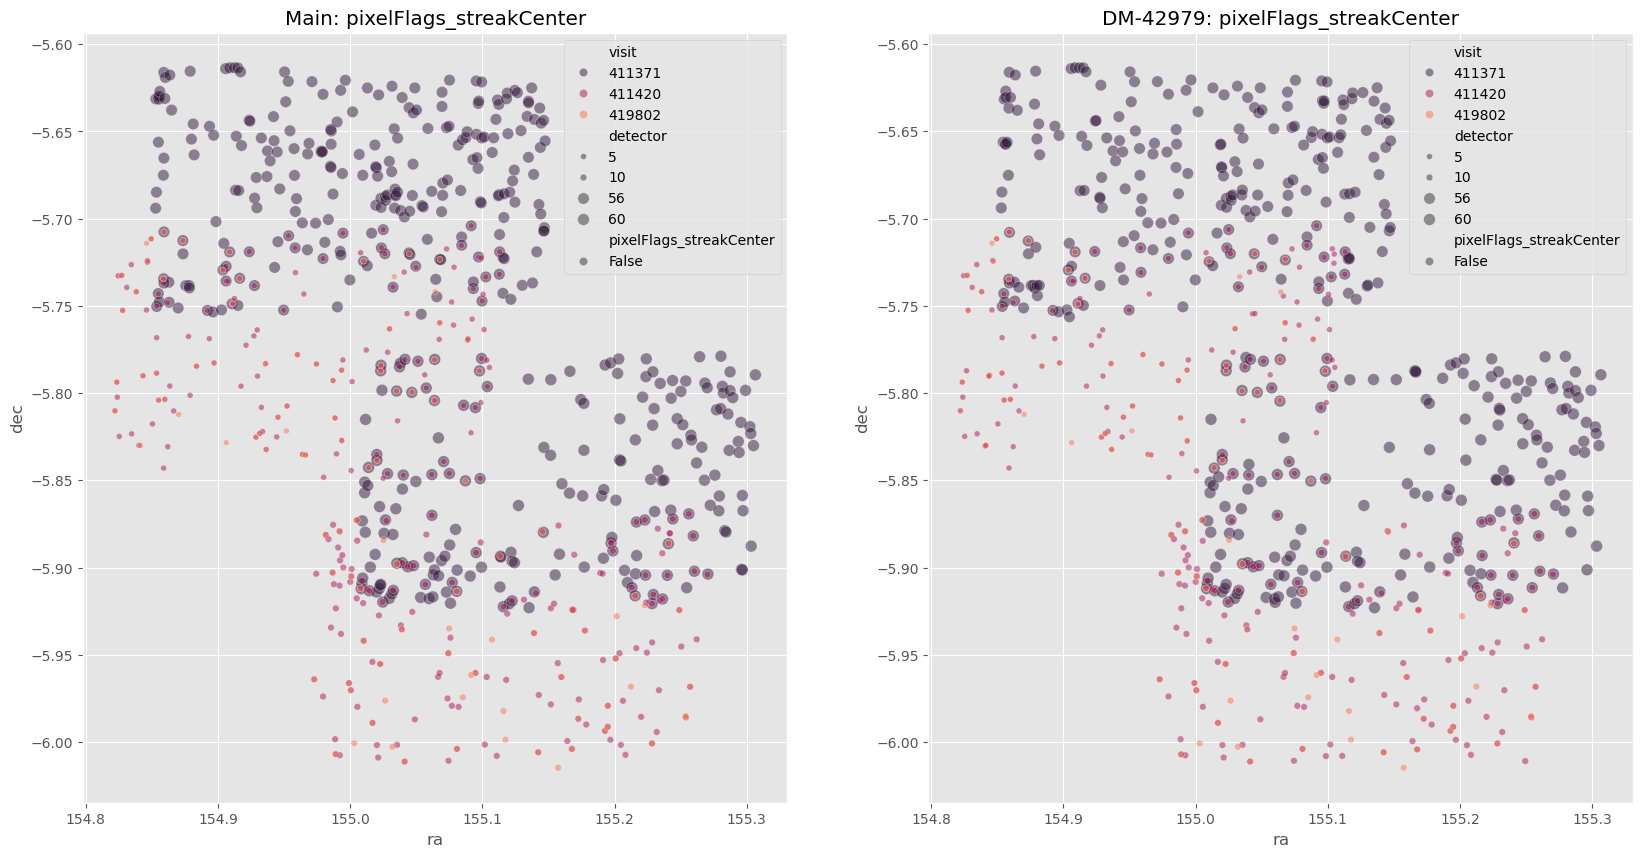

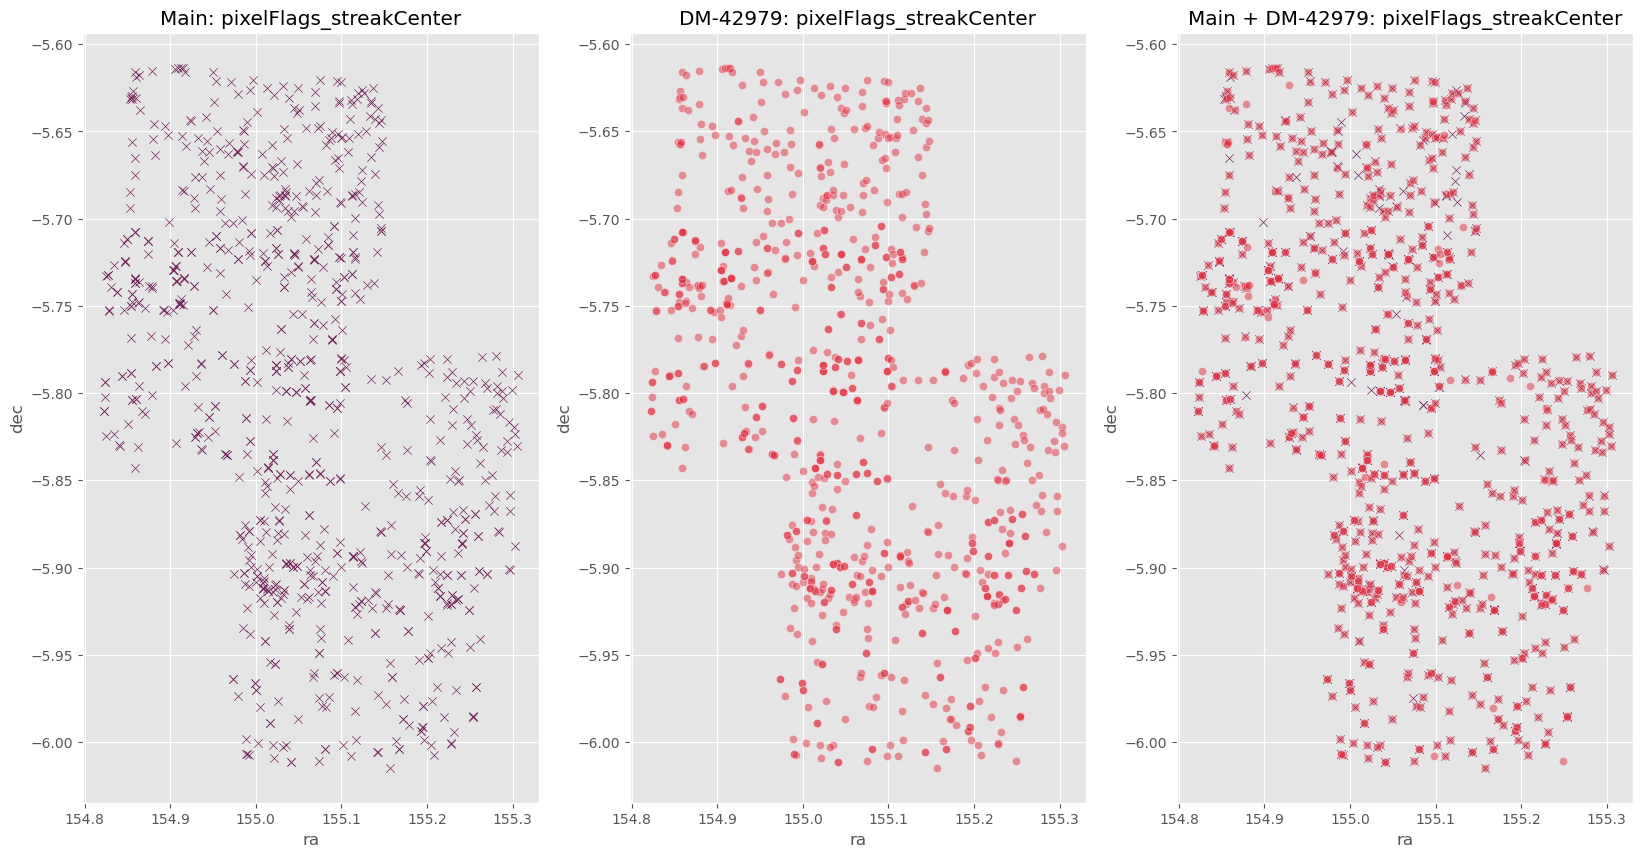

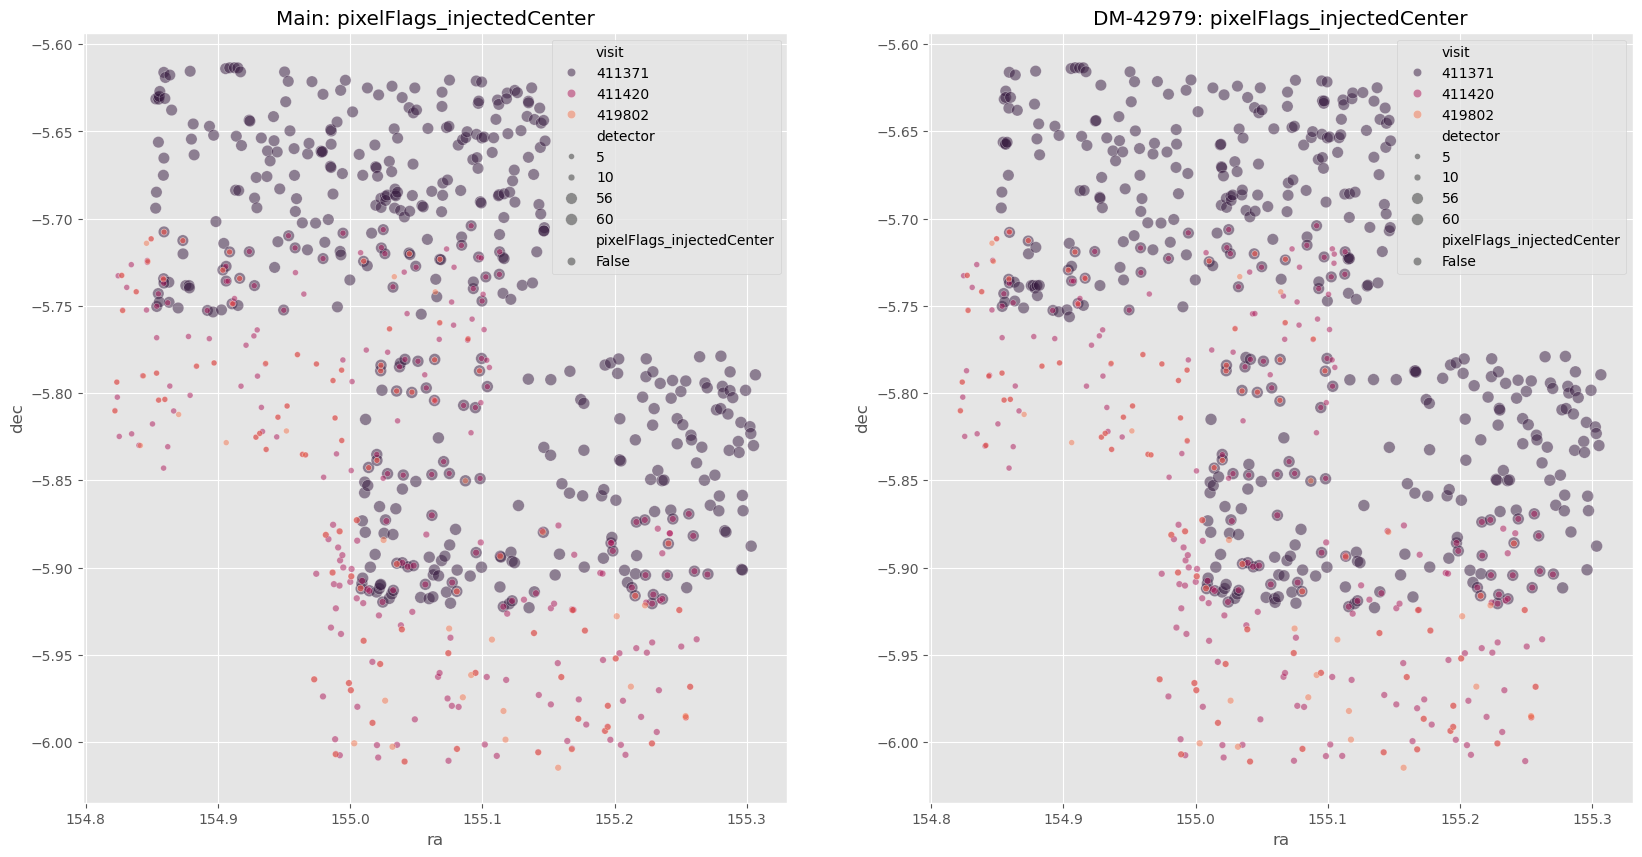

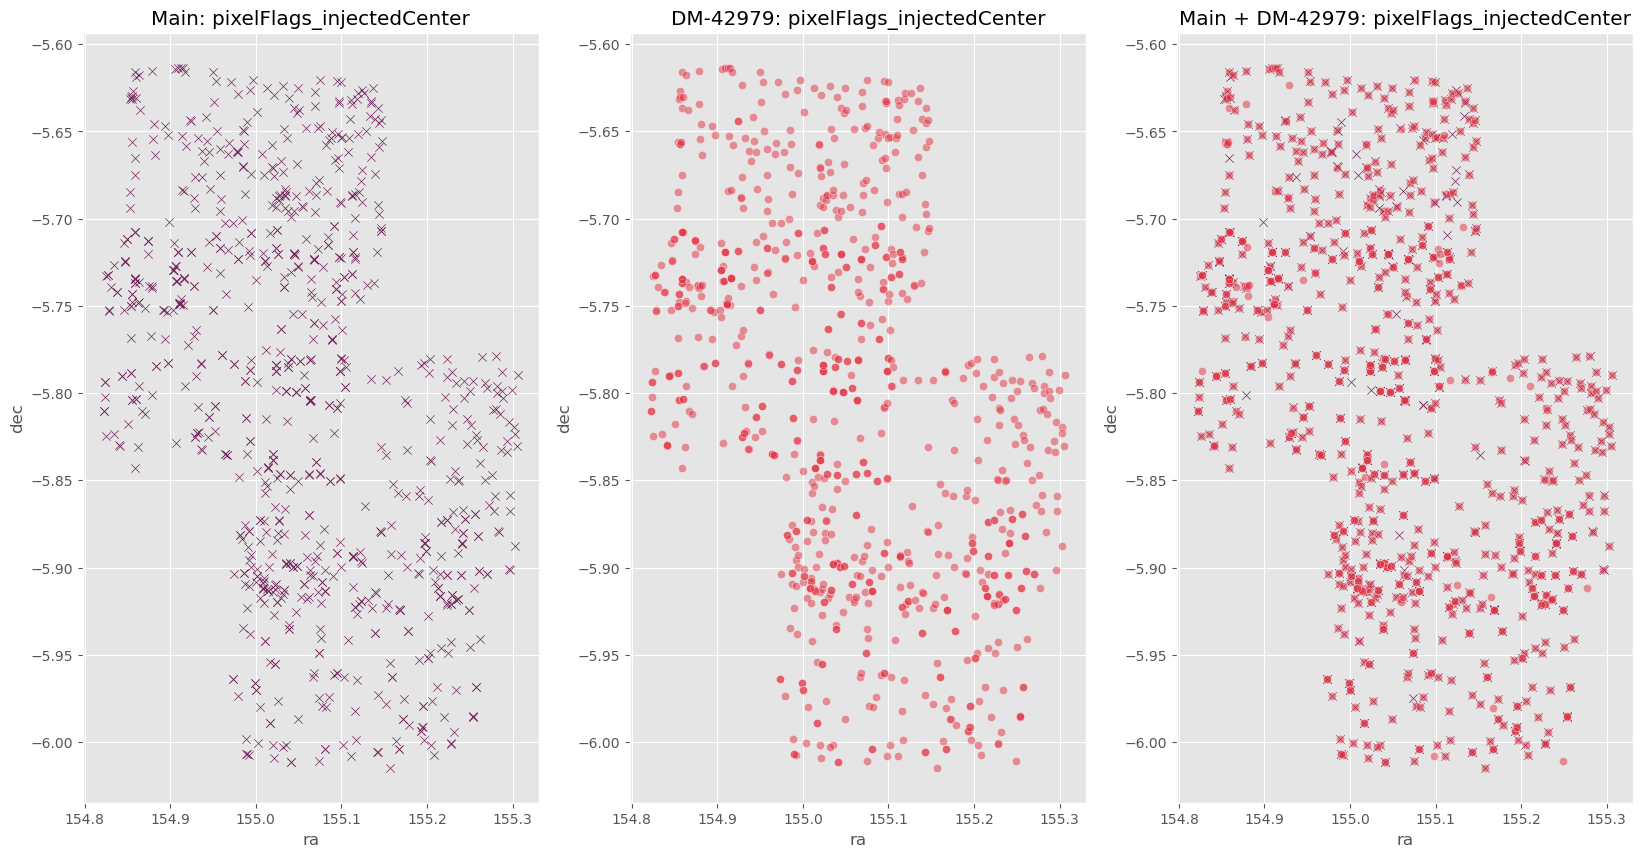

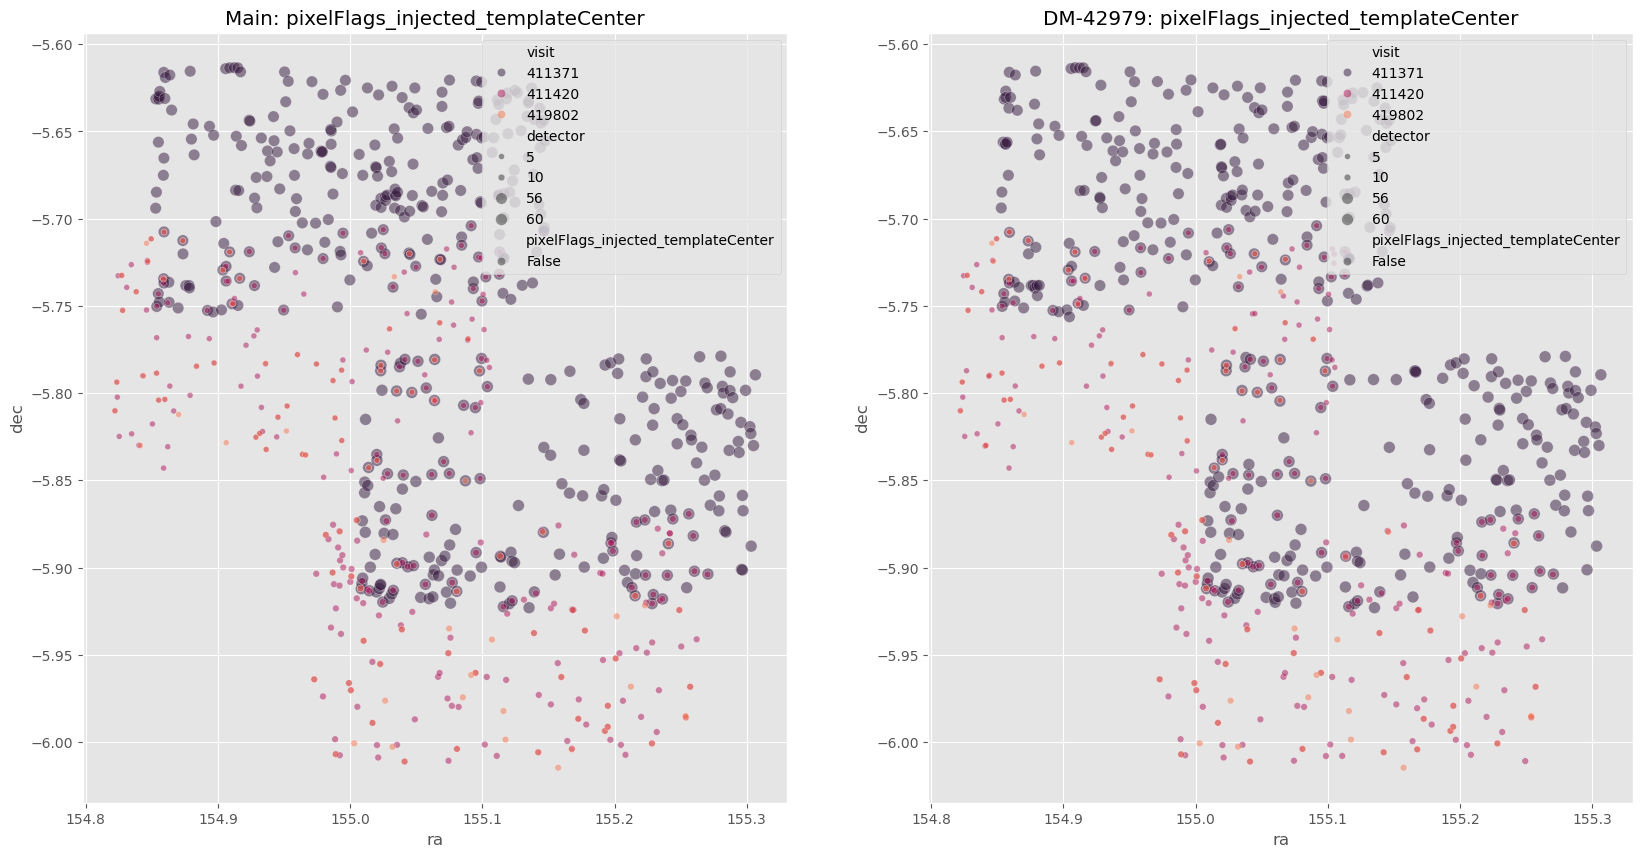

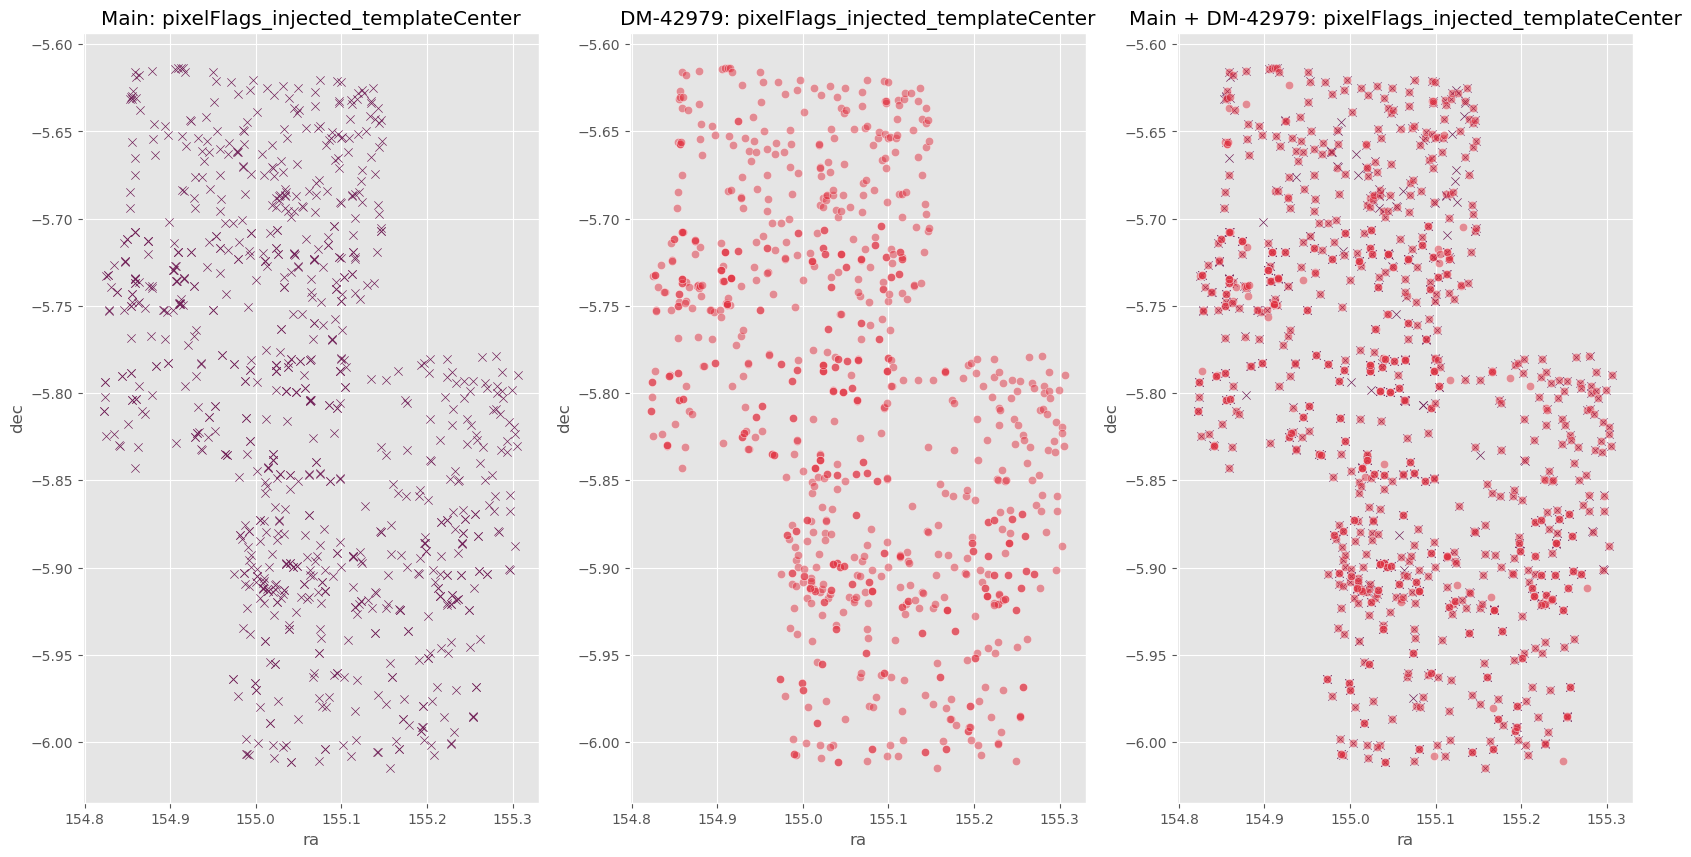

In [32]:
flagComparison(main_run, updated_run)